# Telecom Churn Case Study

## Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing libraries for imputation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Setting option to display all the rows and columns in dataset
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

In [5]:
# Setting plot style to ggplot
plt.style.use('ggplot')

# Importing dataset

In [6]:
df = pd.read_csv("telecom_churn_data.csv")

# Data Understanding, Exploration & Cleaning

## Checking size of the dataset

In [7]:
df.shape

(99999, 226)

## Checking first few rows

In [8]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Checking the summary statistics of the dataset

In [9]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Checking the data types and nullability of columns

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

### Handling date columns

In [11]:
date_var = df.select_dtypes(include='object').columns

In [12]:
for col in date_var:
    df[col] = pd.to_datetime(df[col])

In [13]:
df[date_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

## Checking columns which have NULL values

In [14]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [15]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])

In [16]:
# Columns with NULL values and % of NULLs are populated in descending order
null_data

,Count,Percentage
count_rech_2g_6,74846,74.846748
max_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
night_pck_user_6,74846,74.846748
arpu_2g_6,74846,74.846748
fb_user_6,74846,74.846748
total_rech_data_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748


## Handling NULL values

We need to handle the NULL values with the following steps:
1. Identify missing NULL percentages in the columns (already done above)
2. Identify if the missing values are meaningful/actual missing data
    - Meaningful missing - The associated data is NOT present in the other columns (for e.g. Date & Amount of recharge is missing, hence Count of Recharge will also have NA. Basically, no recharge was made)
    - Actual missing - The associated data is present in the other columns (for e.g. Date & Amount of recharge have valid values, but Count of Recharge has NA. In this case, recharge was made but the count of recharge is missing)
3. Impute Meaningful missing values with 0
4. Check NULL percentage of columns again
    - For higher NULL % (above 40%), drop the columns
    - Impute Actual missing values with Median for continous columns and mode for categorical columns

In [17]:
round(df.isna().sum()/df.shape[0],2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              0.01
std_og_t2o_mou              0.01
loc_ic_t2o_mou              0.01
last_date_of_month_6        0.00
last_date_of_month_7        0.01
last_date_of_month_8        0.01
last_date_of_month_9        0.02
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.04
onnet_mou_7                 0.04
onnet_mou_8                 0.05
onnet_mou_9                 0.08
offnet_mou_6                0.04
offnet_mou_7                0.04
offnet_mou_8                0.05
offnet_mou_9                0.08
roam_ic_mou_6               0.04
roam_ic_mou_7               0.04
roam_ic_mou_8               0.05
roam_ic_mou_9               0.08
roam_og_mou_6               0.04
roam_og_mou_7               0.04
roam_og_mou_8               0.05
roam_og_mou_9               0.08
loc_og_t2t_mou_6            0.04
loc_og_t2t

### Identifying meaningful missing columns

First we will look at all `mobile data` related fields which are NULL. We will check the values of these columns together and see if they are meaningful missing. If the values are NA across all columns this would mean that they are meaningful missing values and that the customer is not using data (2g/3g). We can impute these with zero in that case.

- To understand better, if there is no date of last recharge, total recharge amount must be NA. Similarly, there will be no max recharge amount as well as count of recharge for both 2g and 3g.
- Since there is no 2g and 3g, we will not have any revenue per user. With the data, we can also see that whenever night packs are NA, corresponding 3g and 2g fields are NA as well. And no data also means no access to facebook.
- With this, all of these fields can be imputed with zero.

**Month 6 - June**

In [18]:
df_6 = df[['date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 
    'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']]

In [19]:
df_6[df_6['night_pck_user_6'].isna()].head(5)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the values are missing for all rows together and hence they are meaningful missing values

**Month 7 - July**

In [20]:
df_7 = df[['date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 
    'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'night_pck_user_7', 'arpu_2g_7', 'fb_user_7']]

In [21]:
df_7[df_7['total_rech_data_7'].isna()].head()

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_3g_7,night_pck_user_7,arpu_2g_7,fb_user_7
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the values are missing for all rows together and hence they are meaningful missing values

**Month 8 - August**

In [22]:
df_8 = df[['date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 
    'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8']]

In [23]:
df_8[df_8['fb_user_8'].isna()].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the values are missing for all rows together and hence they are meaningful missing values

**Month 9 - September**

In [24]:
df_9 = df[['date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 
    'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']]

In [25]:
df_9[df_9['av_rech_amt_data_9'].isna()].head()

,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the values are missing for all rows together and hence they are meaningful missing values

### Imputing meaningful missing columns with zero

In [26]:
meaningful_missing_columns = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 
    'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 
    'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 
    'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 
    'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']

In [27]:
df[meaningful_missing_columns] = df[meaningful_missing_columns].apply(lambda x: x.fillna(0))

### Check NULL values again

In [28]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [29]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_9,74077,74.077741
date_of_last_rech_data_8,73660,73.660737
loc_ic_t2m_mou_9,7745,7.745077
loc_og_t2c_mou_9,7745,7.745077
loc_og_mou_9,7745,7.745077
std_og_t2t_mou_9,7745,7.745077
std_og_t2m_mou_9,7745,7.745077
std_og_t2f_mou_9,7745,7.745077


### Drop columns with NULL values over 40%

In [30]:
null_data[ null_data['Percentage'] > 40].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_9', 'date_of_last_rech_data_8'],
      dtype='object')

In [31]:
# Dropping these columns from the dataframe `df`
df.drop(columns=null_data[ null_data['Percentage'] > 40].index, inplace=True)

In [32]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,1.0,1.

### Drop columns not necessary for analysis

We will drop the columns which are not required for analysis. This will constitute information which cannot be aggregated. In our case, we will remove
- mobile_number (this is a primary identifier)
- circle_id (another id field which indicates telephone circle area)
- date fields (last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9)
- date fields (date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8, date_of_last_rech_9)

In [33]:
cols_to_be_dropped = ['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 
                      'last_date_of_month_8', 'last_date_of_month_9', 
                      'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

In [34]:
df.shape

(99999, 222)

In [35]:
df.drop(columns = cols_to_be_dropped, inplace=True)

In [36]:
df.shape

(99999, 212)

We are left with 216 columns

### Check NULL values again

In [37]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
ic_others_9,7745,7.745077
std_og_t2m_mou_9,7745,7.745077
loc_og_t2m_mou_9,7745,7.745077
std_ic_t2f_mou_9,7745,7.745077
loc_og_t2f_mou_9,7745,7.745077
loc_og_t2c_mou_9,7745,7.745077
og_others_9,7745,7.745077
loc_og_mou_9,7745,7.745077
std_ic_t2t_mou_9,7745,7.745077
std_og_t2t_mou_9,7745,7.745077


We can see that the maximum NULL value is 7.74% and all these mismatches are `Actual missing` data.
For these values, we will need to perform Median imputation to impute the data

In [38]:
df[null_data.index].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 119 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    ic_others_9       92254 non-null  float64
 1    std_og_t2m_mou_9  92254 non-null  float64
 2    loc_og_t2m_mou_9  92254 non-null  float64
 3    std_ic_t2f_mou_9  92254 non-null  float64
 4    loc_og_t2f_mou_9  92254 non-null  float64
 5    loc_og_t2c_mou_9  92254 non-null  float64
 6    og_others_9       92254 non-null  float64
 7    loc_og_mou_9      92254 non-null  float64
 8    std_ic_t2t_mou_9  92254 non-null  float64
 9    std_og_t2t_mou_9  92254 non-null  float64
 10   loc_ic_mou_9      92254 non-null  float64
 11   loc_og_t2t_mou_9  92254 non-null  float64
 12   std_og_t2f_mou_9  92254 non-null  float64
 13   loc_ic_t2f_mou_9  92254 non-null  float64
 14   std_og_t2c_mou_9  92254 non-null  float64
 15   std_og_mou_9      92254 non-null  float64
 16   loc_ic_t2m_mou_9  92

In [39]:
df[list(null_data.index)].head()

,ic_others_9,std_og_t2m_mou_9,loc_og_t2m_mou_9,std_ic_t2f_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,og_others_9,loc_og_mou_9,std_ic_t2t_mou_9,std_og_t2t_mou_9,loc_ic_mou_9,loc_og_t2t_mou_9,std_og_t2f_mou_9,loc_ic_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,loc_ic_t2m_mou_9,isd_og_mou_9,loc_ic_t2t_mou_9,spl_og_mou_9,std_ic_t2o_mou_9,std_ic_t2m_mou_9,spl_ic_mou_9,isd_ic_mou_9,roam_ic_mou_9,std_ic_mou_9,roam_og_mou_9,onnet_mou_9,offnet_mou_9,spl_og_mou_8,isd_og_mou_8,loc_ic_t2m_mou_8,onnet_mou_8,std_og_t2m_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,std_og_t2c_mou_8,loc_ic_t2t_mou_8,offnet_mou_8,std_og_t2f_mou_8,loc_ic_mou_8,loc_og_t2t_mou_8,loc_og_t2c_mou_8,std_ic_t2m_mou_8,std_ic_t2o_mou_8,loc_og_t2m_mou_8,std_ic_mou_8,loc_og_t2f_mou_8,roam_og_mou_8,std_ic_t2f_mou_8,std_ic_t2t_mou_8,og_others_8,loc_og_mou_8,roam_ic_mou_8,std_og_t2t_mou_8,spl_ic_mou_8,spl_ic_mou_6,loc_ic_t2f_mou_6,isd_ic_mou_6,std_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2m_mou_6,std_ic_t2o_mou_6,loc_ic_t2m_mou_6,ic_others_6,std_ic_mou_6,loc_ic_t2t_mou_6,std_ic_t2t_mou_6,isd_og_mou_6,std_og_mou_6,loc_og_mou_6,std_og_t2m_mou_6,roam_og_mou_6,std_og_t2f_mou_6,loc_og_t2f_mou_6,std_og_t2c_mou_6,roam_ic_mou_6,std_og_t2t_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,offnet_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2c_mou_6,og_others_6,loc_og_t2m_mou_7,loc_og_t2t_mou_7,std_ic_mou_7,og_others_7,spl_ic_mou_7,roam_og_mou_7,roam_ic_mou_7,offnet_mou_7,isd_ic_mou_7,onnet_mou_7,ic_others_7,std_ic_t2o_mou_7,loc_og_t2c_mou_7,loc_og_t2f_mou_7,std_ic_t2f_mou_7,spl_og_mou_7,loc_ic_t2m_mou_7,isd_og_mou_7,std_og_mou_7,loc_ic_t2f_mou_7,std_og_t2c_mou_7,loc_ic_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,std_ic_t2t_mou_7,std_og_t2t_mou_7,std_ic_t2m_mou_7,loc_og_mou_7,loc_ic_t2t_mou_7,std_og_t2o_mou,loc_ic_t2o_mou,loc_og_t2o_mou
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,4.13,0.00,0.00,0.00,0.0,1.15,0.0,0.0,0.16,0.00,0.00,5.44,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,0.00,0.00,53.76,0.00,0.00,0.00,0.0,72.11,0.00,0.00,173.03,18.34,0.0,0.00,0.0,0.00,56.93,0.0,116.09,0.00,0.0,15.01,0.00,0.00,0.00,15.01,0.00,18.34,53.76,12.76,0.0,375.58,7.68,0.13,0.13,0.0,3.61,0.0,0.0,29.23,304.76,0.00,408.43,7.68,0.00,12.49,0.0,291.86,14.84,0.00,0.00,0.00,2.35,0.0,299.54,0.00,0.00,0.0,0.00,0.00,1.83,0.00,19.09,5.90,0.0,17.48,0.00,5.90,1.61,0.00,0.0,0.23,35.39,0.00,0.0,0.00,0.00,0.0,0.0,0.23,23.88,11.51,15.74,24.11,4.68,0.0,0.00,75.94,74.56,0.00,0.0,0.0,0.00,0.00,99.84,0.00,78.68,0.00,0.0,2.91,0.00,0.00,23.43,65.38,0.0,4.58,8.93,0.0,104.23,0.00,0.46,0.00,4.11,0.00,150.51,29.91,0.0,0.0,0.0
2,0.36,9.28,28.16,3.86,22.24,0.48,0.0,64.81,49.44,8.76,345.41,14.39,0.0,158.19,0.0,18.04,38.98,0.0,148.23,42.08,0.0,118.18,0.45,0.01,38.49,171.49,70.94,74.81,118.91,96.84,0.0,38.89,37.26,75.53,120.94,0.0,49.63,0.0,0.0,67.46,208.36,22.83,155.99,13.58,45.76,167.09,0.0,38.46,239.03,15.61,0.00,43.23,28.69,0.0,67.66,0.00,22.58,0.0,0.21,99.48,0.00,21.73,229.56,45.18,0.0,14.38,0.93,139.33,115.69,72.41,0.0,47.64,60.66,41.81,0.0,1.48,24.11,0.0,0.0,4.34,7.19,29.34,143.33,11.54,46.56,0.0,0.45,16.86,28.74,306.66,0.0,0.0,0.00,0.00,220.59,0.85,55.24,3.14,0.0,135.54,21.79,58.34,236.84,15.44,0.0,108.68,122.29,0.0,208.86,14.76,67.41,71.29,26.49,177.01,67.41,71.11,0.0,0.0,0.0
3,0.80,9.99,65.46,0.00,2.06,0.00,0.0,83.03,129.84,226.21,160.19,15.49,0.0,65.59,0.0,236.21,52.86,0.0,41.73,43.29,0.0,13.98,0.55,0.00,0.00,143.83,0.00,241.71,113.54,18.09,0.0,20.28,310.98,6.53,296.11,0.0,19.84,0.0,0.0,8.04,71.68,0.00,48.18,10.61,0.00,4.94,0.0,22.46,4.94,4.91,39.04,0.00,0.00,0.0,37.99,44.38,289.58,0.0,0.59,57.43,0.00,1.18,233.48,1.33,0.0,113.96,0.00,45.99,62.08,43.48,0.0,29.23,183.03,2.99,0.0,0.00,1.91,0.0,0.0

All the columns having NULL values are continuous in nature. Before we proceed further for imputation, we need to tackle couple of steps
1. Filter the data for High value customers
    - As we see in the problem statement, we need to predict the churn only for high-value customers i.e., the top 20% customers who contribute to 80% of the revenue
    - This will also help in reducing the processing power as we will deal with less data than that entire dataset (~100K)
2. We need to create a target variable to predict the churn for the 9th month
    - We will create a churn variable as a target variable
3. We will then proceed with median imputation of NULL values

## Filter high value customers

Steps for filtering high value customers:
* We will only look at the data for the first two months i.e., The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
* Calculate total recharge amount (including both mobile and data recharge) for months 6 and 7
    - Calculate total data recharge amount = Total data recharge * Average recharge amount (6 and 7)
    - Calculate total recharge amount = total recharge amount mobile + total recharge amount data
* Calculate average recharge done by the customer in June and July (6 & 7)
    - Average recharge amount = (total recharge amount 6 + total recharge amount 7) / 2
* Find out 70th percentile average recharge amount
* Retain only those customers who have recharged their mobiles with >= 70th percentile

In [40]:
# Check if the related columns don't have NULL values as we will be using the calculation based on this to 
# filter the entire dataset
df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_data_6', 'total_rech_data_7', 
    'av_rech_amt_data_6', 'av_rech_amt_data_7']].isna().sum()

total_rech_amt_6      0
total_rech_amt_7      0
total_rech_data_6     0
total_rech_data_7     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
dtype: int64

In [41]:
# Calculate total recharge data amount for months 6 and 7
df['total_rech_amt_data_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rech_amt_data_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

In [42]:
# Calculate total recharge amount for both mobile and data
df['total_rech_amt_6_combined'] = df['total_rech_amt_6'] + df['total_rech_amt_data_6']
df['total_rech_amt_7_combined'] = df['total_rech_amt_7'] + df['total_rech_amt_data_7']

In [43]:
# Calculate average recharge done by the customer in June and July (6 & 7)
df['av_rech_amt_6_7'] = (df['total_rech_amt_6_combined'] + df['total_rech_amt_7_combined']) / 2

In [44]:
# Calculate 70th percentile average recharge amount
percentile_70_value = df['av_rech_amt_6_7'].quantile(q=0.7)
percentile_70_value

478.0

In [45]:
# Retain only those customers who have recharged their mobiles with >= 70th percentile
df[df['av_rech_amt_6_7']>= percentile_70_value].shape

(30001, 217)

In [46]:
df_hv = df[df['av_rech_amt_6_7']>= percentile_70_value].copy()

In [47]:
df_hv.shape

(30001, 217)

We are retaining 30001 high value customers in the dataframe `df_hv`

## Deriving Churn (target variable)

There are various ways to define churn, such as:

> Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

> Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

For this problem statement, we will use **usage-based definition** to define churn

In churn prediction, we assume that there are three phases of customer lifecycle :
- *The ‘good’ phase*: In this phase, the customer is happy with the service and behaves as usual. Corresponds to months 6 & 7
- *The ‘action’ phase*: The customer experience starts to sore in this phase. Corresponds to month 8
- *The ‘churn’ phase*: In this phase, the customer is said to have churned. We will define churn based on this phase. Corresponds to month 9. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

We will follow the below steps to derive churn:
1. Calculate total incoming and outgoing minutes of usage
2. Calculate 2g and 3g data consumption
3. Create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
4. Check Churn percentage
5. Delete all columns that belong to the churn month 9

In [48]:
# Check if the related columns don't have NULL values as we will be deriving the target variable based on this
df_hv[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [49]:
# Calculate total incoming and outgoing minutes of usage
df_hv['total_ic_og_mou_9'] = df_hv['total_ic_mou_9'] + df_hv['total_og_mou_9']

In [50]:
# Calculate 2g and 3g data consumption
df_hv['vol_2g_3g_mb_9'] = df_hv['vol_2g_mb_9'] + df_hv['vol_3g_mb_9']

In [51]:
# Initializing Churn variable with default value of 0
df_hv['churn'] = 0

In [52]:
# Updating Churn to 1 where there are no calls or internet in the month of September indicating they have churned
df_hv.loc[(df_hv['total_ic_og_mou_9']==0) & (df_hv['vol_2g_3g_mb_9']==0), 'churn'] = 1

In [53]:
# Check churn percentage
round(df_hv['churn'].value_counts(normalize=True)*100, 2)

0    91.86
1     8.14
Name: churn, dtype: float64

There is a heavy class imbalance for the target variable `churn`. We will need to handle this later on.
- Churned customers make up only 8.14% of the data
- Non-churned customers make up the remaining 91.86% of the data

In [54]:
# Getting list of 9th month columns
columns_month_9 = list(df_hv.columns[df_hv.columns.str.endswith(pat='_9')])
columns_month_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_ic_og_mou_9',
 'vol_2g_3g_mb_9']

In [55]:
# As we have used 9th month columns to derive the target variable "churn", we will go ahead and drop all 9th month columns
# from the entire dataset
hv = df_hv.loc[:, ~df_hv.columns.isin(columns_month_9)].copy()

In [56]:
hv.shape

(30001, 167)

In [57]:
hv_columns = list(hv.columns)
hv_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

None of the 9th month columns are visible in above list and so we have successfully removed them

## Dropping unimportant columns

We will be dropping the columns if the variance in the column is very less. We do this because they provides little scope for the model to learn.

In [58]:
# Creating a dictionary to hold the unique values of each column
unique_dict = dict()
for each_col in hv_columns:
    unique_dict[each_col] = hv[each_col].nunique()

In [59]:
# Creating a pandas series to hold the unique values from the dictionary
unique_df = pd.Series(data=unique_dict).sort_values(ascending=True)
unique_df

loc_og_t2o_mou                   1
std_ic_t2o_mou_7                 1
std_ic_t2o_mou_6                 1
std_og_t2c_mou_8                 1
std_og_t2c_mou_7                 1
std_og_t2c_mou_6                 1
std_ic_t2o_mou_8                 1
std_og_t2o_mou                   1
loc_ic_t2o_mou                   1
churn                            2
fb_user_6                        2
fb_user_7                        2
night_pck_user_8                 2
night_pck_user_7                 2
night_pck_user_6                 2
fb_user_8                        2
monthly_2g_6                     5
monthly_2g_7                     6
monthly_2g_8                     6
monthly_3g_8                    12
monthly_3g_6                    12
monthly_3g_7                    15
count_rech_3g_6                 25
sachet_3g_6                     25
sachet_3g_7                     27
count_rech_3g_7                 28
sachet_3g_8                     29
count_rech_3g_8                 29
count_rech_2g_6     

In [60]:
# We need to filter the columns which have only 1 unique value and remove them from "hv" dataframe as they
remove_columns_unique = unique_df[unique_df==1].index
remove_columns_unique

Index(['loc_og_t2o_mou', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_7', 'std_og_t2c_mou_6',
       'std_ic_t2o_mou_8', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],
      dtype='object')

In [61]:
# Checking shape before column removal
hv.shape

(30001, 167)

In [62]:
# Remove the columns from the dataframe "hv"
hv.drop(columns=remove_columns_unique, inplace=True)

In [63]:
# Checking shape post column removal
hv.shape

(30001, 158)

## Check the NULLable columns left

In [64]:
# Getting total number of NULL values and percentage of the columns

null_value_count = hv[hv.columns[hv.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (hv[hv.columns[hv.isna().any()]].isna().sum() * 100 / hv.shape[0]).sort_values(ascending=False)

null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
ic_others_8,1174,3.913203
loc_og_t2m_mou_8,1174,3.913203
std_og_mou_8,1174,3.913203
spl_og_mou_8,1174,3.913203
std_og_t2f_mou_8,1174,3.913203
og_others_8,1174,3.913203
std_og_t2m_mou_8,1174,3.913203
loc_ic_t2t_mou_8,1174,3.913203
std_og_t2t_mou_8,1174,3.913203
loc_ic_t2m_mou_8,1174,3.913203


In [65]:
null_data.shape

(81, 2)

There are still **81** columns which have NULL values that needs to be handled

In [66]:
# Checking the data of NULLable columns
hv[null_data.index].head(10)

,ic_others_8,loc_og_t2m_mou_8,std_og_mou_8,spl_og_mou_8,std_og_t2f_mou_8,og_others_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,std_og_t2t_mou_8,loc_ic_t2m_mou_8,loc_og_mou_8,loc_ic_t2f_mou_8,loc_og_t2c_mou_8,loc_ic_mou_8,isd_og_mou_8,std_ic_t2t_mou_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,spl_ic_mou_8,onnet_mou_8,loc_og_t2t_mou_8,std_ic_t2f_mou_8,isd_ic_mou_8,roam_og_mou_8,std_ic_mou_8,offnet_mou_8,roam_ic_mou_8,ic_others_6,og_others_6,loc_ic_t2t_mou_6,isd_ic_mou_6,spl_ic_mou_6,loc_ic_t2m_mou_6,std_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2f_mou_6,spl_og_mou_6,onnet_mou_6,roam_og_mou_6,std_og_t2m_mou_6,loc_og_t2f_mou_6,isd_og_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_og_mou_6,std_og_t2t_mou_6,loc_og_t2m_mou_6,roam_ic_mou_6,std_og_t2f_mou_6,std_og_mou_6,offnet_mou_6,roam_ic_mou_7,spl_ic_mou_7,loc_og_t2m_mou_7,roam_og_mou_7,std_ic_mou_7,isd_ic_mou_7,offnet_mou_7,loc_og_t2t_mou_7,std_ic_t2f_mou_7,ic_others_7,onnet_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_ic_mou_7,loc_og_mou_7,loc_ic_t2f_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,std_og_t2m_mou_7,loc_ic_t2t_mou_7,std_og_t2f_mou_7,og_others_7,std_og_mou_7,spl_og_mou_7,isd_og_mou_7
0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15.14,162.28,77.84,6.50,16.68,0.0,49.14,27.31,12.01,121.19,255.79,39.53,0.00,188.04,10.01,30.39,53.23,141.33,0.0,52.29,40.28,22.21,31.59,38.06,193.94,325.91,31.64,15.74,0.00,58.14,2.06,0.21,217.56,91.44,152.16,427.88,180.54,36.89,52.19,4.50,57.84,23.74,49.89,62.13,0.00,0.00,51.39,422.16,4.30,308.63,16.23,6.66,60.86,453.43,33.49,0.0,447.38,12.59,173.08,14.53,567.16,31.38,34.24,15.19,54.68,11.83,126.99,55.14,0.0,355.23,533.91,101.46,23.29,221.49,31.76,32.26,20.08,0.0,75.14,0.00,0.18
8,0.00,50.54,98.28,10.23,0.00,0.0,75.69,0.31,22.58,15.48,63.04,0.00,7.15,15.79,0.00,0.10,0.00,0.65,0.0,35.08,12.49,0.00,0.00,0.00,0.75,136.48,0.00,0.00,0.00,23.84,0.00,0.00,57.58,22.43,0.00,81.43,22.43,0.00,0.00,0.00,413.69,0.00,13.69,0.00,0.00,0.00,297.13,378.09,116.56,80.96,0.00,0.00,130.26,94.66,0.00,0.0,70.58,0.00,4.66,0.00,80.63,217.59,0.00,0.00,351.03,0.58,4.08,0.00,0.0,23.83,288.18,0.00,133.43,13.98,10.04,9.84,0.00,0.0,143.48,0.00,0.00
21,0.00,104.81,938.79,0.00,0.00,0.0,876.99,19.54,61.79,129.16,129.74,10.39,0.00,159.11,0.00,0.18,1.58,101.74,0.0,85.14,23.34,0.00,0.00,0.00,101.93,983.39,0.00,0.00,0.00,2.48,0.00,0.00,118.23,67.69,4.61,125.33,81.76,14.06,0.00,0.00,102.41,0.00,665.36,0.75,0.00,0.00,4.48,97.04,97.93,91.81,0.00,0.00,763.29,757.93,0.00,0.0,87.93,0.00,44.21,0.00,896.68,6.16,0.00,0.00,132.11,5.98,38.23,0.00,0.0,87.68,94.09,2.84,125.94,74.63,808.74,10.19,0.00,0.0,934.69,0.00,0.00
23,13.06,148.56,39.61,17.71,0.00,0.0,39.61,76.64,0.00,146.84,182.14,0.71,17.71,224.21,0.00,13.38,0.00,43.91,0.0,33.58,33.58,0.00,3.74,0.00,57.29,205.89,0.00,0.00,0.00,20.71,0.00,0.00,95.91,2.43,0.00,116.63,2.94,0.51,0.00,0.10,48.96,0.00,2.36,0.00,0.00,0.00,48.96,131.91,0.00,82.94,0.00,0.00,2.36,85.41,0.00,0.0,83.01,0.00,14.89,28.23,89.36,50.66,0.00,5.35,50.66,0.00,14.89,0.00,0.0,174.41,133.68,0.00,0.00,113.36,6.35,61.04,0.00,0.0,6.35,0.00,0.01
33,0.20,0.00,0.00,0.56,0.00,0.0,0.00,2.45,0.00,37.93,0.00,0.16,0.56,40.54,0.00,0.05,0.00,0.86,0.0,0.00,0.00,0.13,0.00,0.00,1.04,0.00,0.00,1.23,0.00,1.75,0.00,0.00,0.00,2.95,1.73,3.48,3.18,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,5.66,0.00,0.00,0.00,0.96,0.65,0.00,2.91,1.78,0.00,0.0,0.88,0.00,0.31,0.00,0.00,0.00,0.56,0.00,0.0,0.00,0.00,0.00
38,0.00,18.96,735.74,0.00,0.00,0.0,78.84,1.36,656.89,28.06,28.44,0.00,0.00,29.43,0.00,5.59,0.00,13.41,0.0,666.38,9.48,0.00,1.20,0.00,19.01,97.81,0.00,0.00,0.00,8.68,0.00,0.00,37.99,19.56,0.00,4

In [67]:
# Check the data type of NULLable columns
hv[null_data.index].dtypes.unique()

array([dtype('float64')], dtype=object)

All the NULLable columns are continuous in nature and we need to impute the data with median

## Imputation using median

In [68]:
# Getting the list of NULLable columns
null_columns = list(null_data.index)

In [69]:
# Median values that will be used for imputation
for each_col in null_columns:
    print(each_col, " - ", hv[each_col].median())

ic_others_8  -  0.0
loc_og_t2m_mou_8  -  74.54
std_og_mou_8  -  32.68
spl_og_mou_8  -  0.66
std_og_t2f_mou_8  -  0.0
og_others_8  -  0.0
std_og_t2m_mou_8  -  12.26
loc_ic_t2t_mou_8  -  24.76
std_og_t2t_mou_8  -  1.43
loc_ic_t2m_mou_8  -  85.79
loc_og_mou_8  -  120.86
loc_ic_t2f_mou_8  -  2.01
loc_og_t2c_mou_8  -  0.0
loc_ic_mou_8  -  137.59
isd_og_mou_8  -  0.0
std_ic_t2t_mou_8  -  0.28
loc_og_t2f_mou_8  -  0.0
std_ic_t2m_mou_8  -  4.41
spl_ic_mou_8  -  0.0
onnet_mou_8  -  72.93
loc_og_t2t_mou_8  -  23.24
std_ic_t2f_mou_8  -  0.0
isd_ic_mou_8  -  0.0
roam_og_mou_8  -  0.0
std_ic_mou_8  -  10.54
offnet_mou_8  -  197.59
roam_ic_mou_8  -  0.0
ic_others_6  -  0.0
og_others_6  -  0.0
loc_ic_t2t_mou_6  -  26.03
isd_ic_mou_6  -  0.0
spl_ic_mou_6  -  0.0
loc_ic_t2m_mou_6  -  86.76
std_ic_t2m_mou_6  -  5.34
loc_ic_t2f_mou_6  -  2.01
loc_ic_mou_6  -  138.63
std_ic_mou_6  -  11.98
std_ic_t2t_mou_6  -  0.48
std_ic_t2f_mou_6  -  0.0
spl_og_mou_6  -  0.31
onnet_mou_6  -  88.06
roam_og_mou_6  -  0.0


In [70]:
# Loop over the NULLable columns and impute by median
for each_col in null_columns:
    hv[each_col].fillna(hv[each_col].median(), inplace=True)

### Check if any NULL values are left

In [71]:
null_value_count = hv[hv.columns[hv.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (hv[hv.columns[hv.isna().any()]].isna().sum() * 100 / hv.shape[0]).sort_values(ascending=False)

null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


There are no NULL values left in the data after median imputation

# Data Preparation

We will follow the below steps as part of Data Preparation:
1. Derive new features (at least 3) that could be important indicators of churn
2. Exploratory Data Analysis
3. Outlier treatment
4. Train, test & split
5. Scaling

## Derive new features

We will derive the following features
1. Tenure of customer based on aon in years (Age on Network)
2. As 6 & 7 months are good periods, we can derive few features to compare against how they performed against 8th month.
    - Average On Network Minutes of Usage for 6 & 7
    - Average Off Network Minutes of Usage for 6 & 7
3. Avg count of total recharge (2G + 3G) for 6 & 7

### aon_years

In [72]:
# Create "aon_years" column to see the age of customer in years
hv['aon_years'] = round(hv['aon']/365,0)
hv['aon_years'].head()

0     3.0
7     2.0
8     1.0
21    2.0
23    2.0
Name: aon_years, dtype: float64

In [73]:
# Drop "aon" column
hv.drop("aon", axis=1, inplace=True)

### avg_onnet_mou_6_7

In [74]:
# Average On Network Minutes of Usage for 6 & 7
hv['avg_onnet_mou_6_7'] = (hv['onnet_mou_6'] + hv['onnet_mou_7']) / 2

In [75]:
# Drop "onnet_mou_6" and "onnet_mou_7" columns
hv.drop(["onnet_mou_6", "onnet_mou_7"], axis=1, inplace=True)

### avg_offnet_mou_6_7

In [76]:
# Average Off Network Minutes of Usage for 6 & 7
hv['avg_offnet_mou_6_7'] = (hv['offnet_mou_6'] + hv['offnet_mou_7']) / 2

In [77]:
# Drop "offnet_mou_6" and "offnet_mou_7" columns
hv.drop(["offnet_mou_6", "offnet_mou_7"], axis=1, inplace=True)

### avg_count_rech_2g3g_6_7

In [78]:
count_rech_2g_6_7 = hv['count_rech_2g_6'] + hv['count_rech_2g_7']
count_rech_3g_6_7 = hv['count_rech_3g_6'] + hv['count_rech_3g_7']

In [79]:
# Avg count of total recharge (2G + 3G) for 6 & 7
hv['avg_count_rech_2g3g_6_7'] = (count_rech_2g_6_7 + count_rech_3g_6_7) / 2

## EDA

### Univariate analysis

In [80]:
# Univariate analyis - numerical variables with outlier handling
def fn_uni_num(dt, column):
    
    plt.figure(figsize = [20,8])

    plt.subplot(1,2,1)
    pltname = column + ' - without handling outliers'
    plt.title(pltname)
    sns.histplot(data=dt, x=column, color='blue')
    plt.xticks(rotation = 45)
    
    Q1 = hv[column].quantile(0.25)
    Q3 = hv[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    print("Min value before which outlier exist: {}".format(Min_value))
    print("Max value after which outlier exist: {}".format(Max_value))
    
    plt.subplot(1,2,2)
    pltname = column + ' - with handling outliers'
    plt.title(pltname)
    sns.histplot(data=hv, x=dt[dt[column] <= Max_value][column], color='green')
    plt.xticks(rotation = 45)

    plt.tight_layout(pad = 4)
    plt.show()

#### aon_years

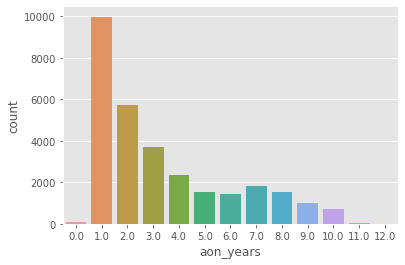

In [81]:
sns.countplot(x = 'aon_years', data = hv)
plt.show()

We have more data for customers with age of network in 1st, 2nd and 3rd years and the data decreases for customers with more time on network

#### churn

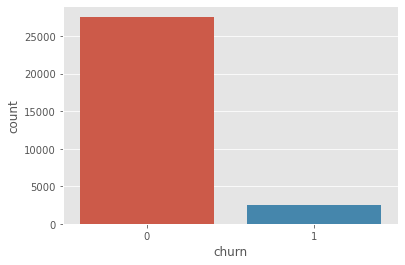

In [82]:
sns.countplot(x = 'churn', data = hv)
plt.show()

We can see a heavy class imbalance for churn class 1 (People who have moved out of the network). This needs to be handled later on

#### avg_onnet_mou_6_7

Min value before which outlier exist: -400.65250000000003
Max value after which outlier exist: 732.4875


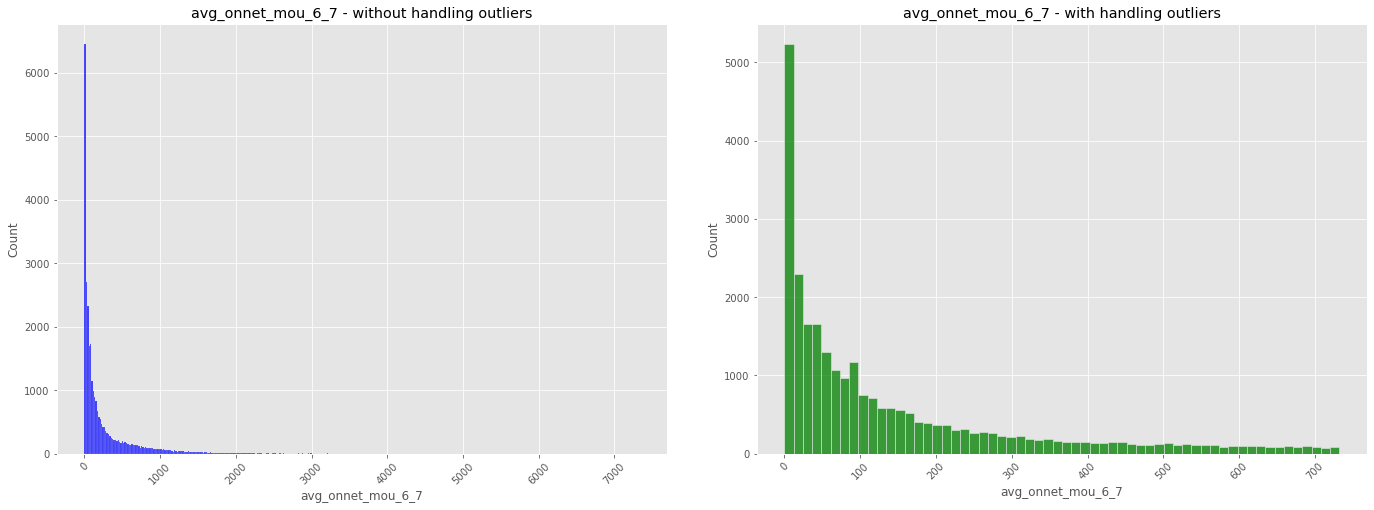

In [83]:
fn_uni_num(dt=hv, column='avg_onnet_mou_6_7')

Data is more for less minutes of on network usage at 0 and steadily decreases with more minutes of usage

#### avg_offnet_mou_6_7

Min value before which outlier exist: -515.4399999999999
Max value after which outlier exist: 1108.1599999999999


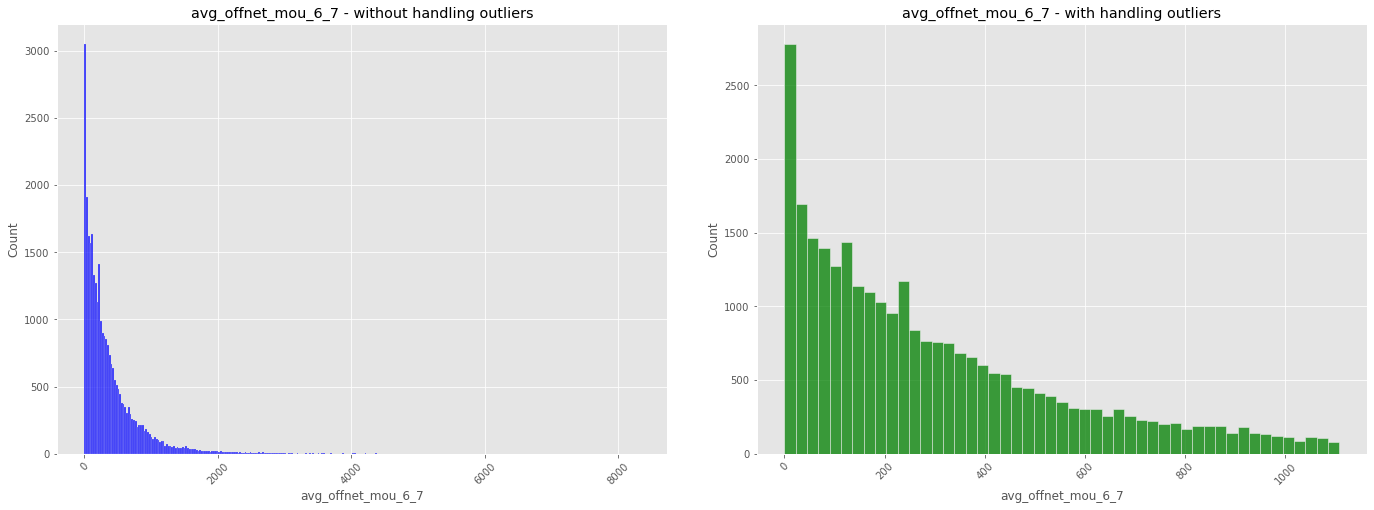

In [84]:
fn_uni_num(dt=hv, column='avg_offnet_mou_6_7')

Data is more for less minutes of off network usage at 0 and steadily decreases with more minutes of usage

#### avg_count_rech_2g3g_6_7

Min value before which outlier exist: -3.0
Max value after which outlier exist: 5.0


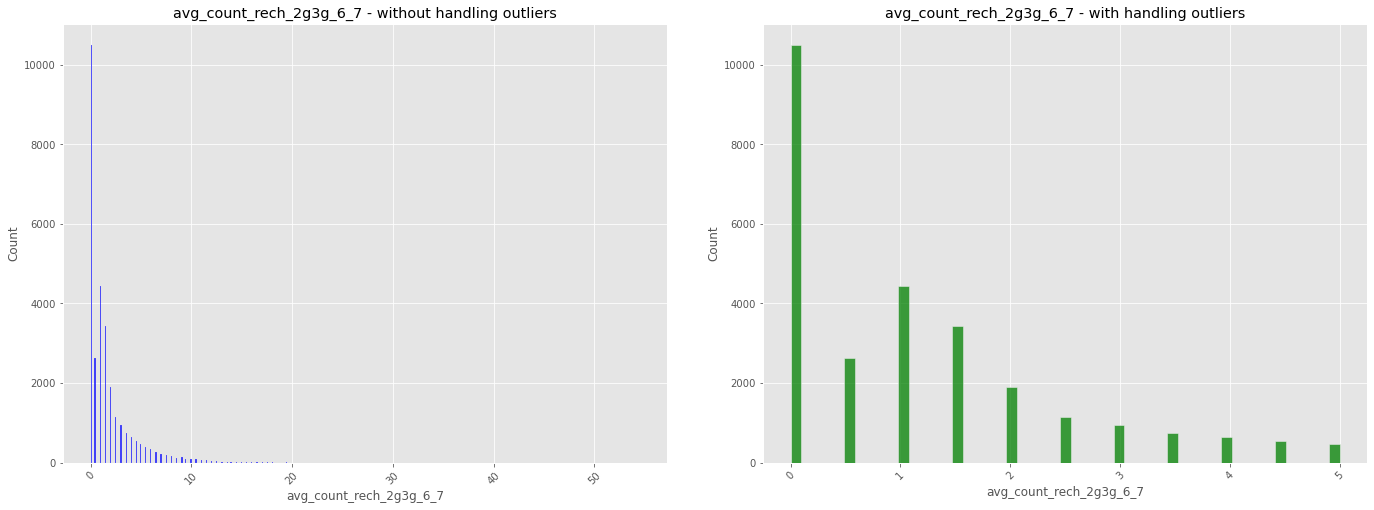

In [85]:
fn_uni_num(dt=hv, column='avg_count_rech_2g3g_6_7')

Recharge count of 2g and 3g is highest near zero data recharge and the trend follows the decreasing pattern of more data recharges in 6 & 7

### Bivariate analysis

In [86]:
def fn_bi_boxplot(dt,categorical,continuous):
    plt.figure(figsize = [10,6])
    
    Q1 = hv[continuous].quantile(0.25)
    Q3 = hv[continuous].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    print("Min value before which outlier exist: {}".format(Min_value))
    print("Max value after which outlier exist: {}".format(Max_value))
    
    pltname = f"{categorical} v/s {continuous} - with handling outliers"
    plt.title(pltname)
    sns.boxplot(data=dt, x=categorical, y=dt[dt[continuous] <= Max_value][continuous], color='green')
    plt.xticks(rotation = 45)

    plt.tight_layout(pad = 4)
    plt.show()

#### arpu_6 vs churn

Min value before which outlier exist: -275.25199999999995
Max value after which outlier exist: 1285.06


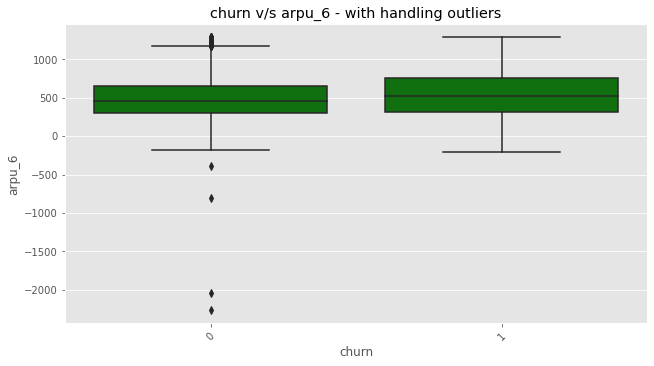

In [87]:
fn_bi_boxplot(dt=hv,categorical='churn',continuous='arpu_6')

Median average revenue per user for month 6 is higher for churned customers compared to non-churned customers

#### avg_count_rech_2g3g_6_7 vs churn

Min value before which outlier exist: -3.0
Max value after which outlier exist: 5.0


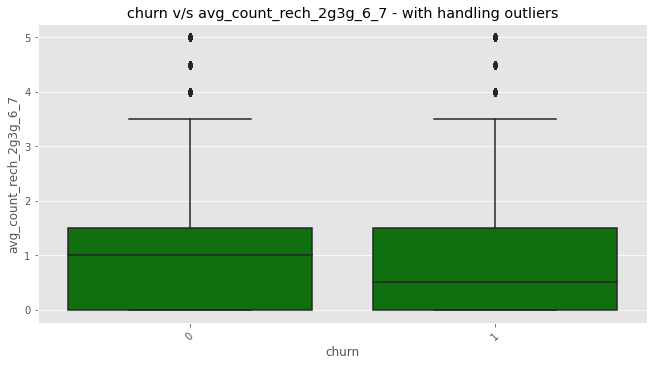

In [88]:
fn_bi_boxplot(dt=hv,categorical='churn',continuous='avg_count_rech_2g3g_6_7')

Median Average data recharge count for months 6&7 is close to zero which indicates no recharge for churned customers.
For non-churned customers, we can see that they made at least one recharge

#### last_day_rch_amt_8 vs churn

Min value before which outlier exist: -195.0
Max value after which outlier exist: 325.0


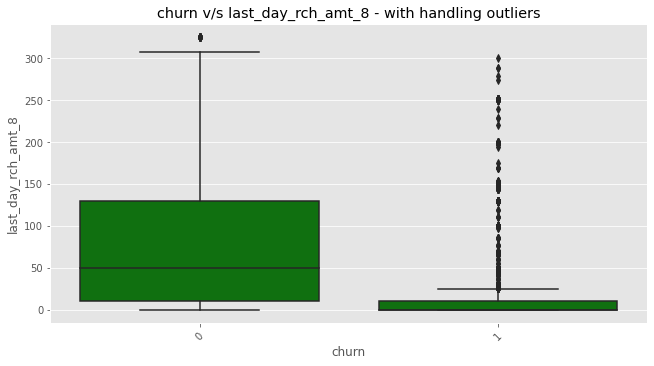

In [89]:
fn_bi_boxplot(dt=hv,categorical='churn',continuous='last_day_rch_amt_8')

Median last day recharge amount for month 8 (action phase) is close to zero which indicates no recharge for churned customers. So, we can clearly see that they make less purchases in month 8 and they churn at month 9

#### onnet_mou_8 vs churn

Min value before which outlier exist: -320.865
Max value after which outlier exist: 576.455


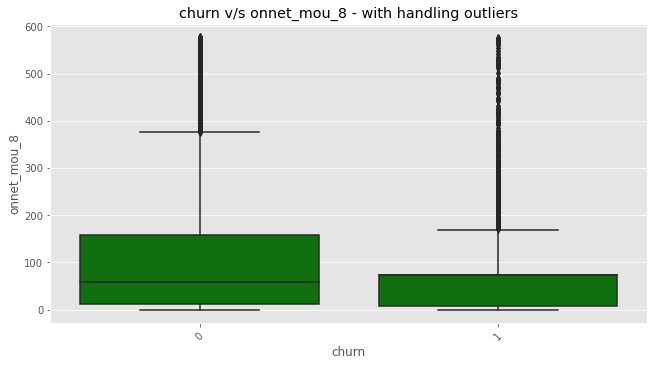

In [90]:
fn_bi_boxplot(dt=hv,categorical='churn',continuous='onnet_mou_8')

Median on network minutes of usage for month 8 (action phase) is very less for churned customers compared to non-churned customers. This clearly shows their usage also decreasing over the network before they churn.

#### aon_years V/s churn

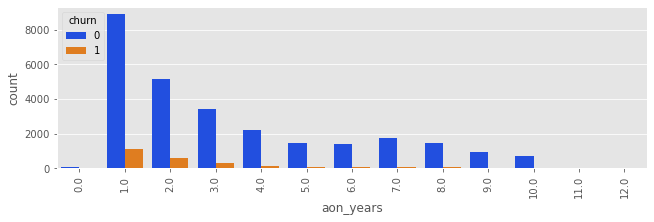

In [91]:
plt.figure(figsize = [10,4])
palt = sns.color_palette("bright")
sns.countplot(x = 'aon_years', data = hv, palette = palt, hue = 'churn')
plt.xticks(rotation = 90)
plt.tight_layout(pad = 4)
plt.show()

As the age of customer increases in the network, their churn decreases.
So, if we retain the customer for a longer period, they would churn less.

### Creating correlation matrix and heatmap to understand the relationship b/w features

As there are many features in the dataset, we will only look at the top 20 correlated features with churn

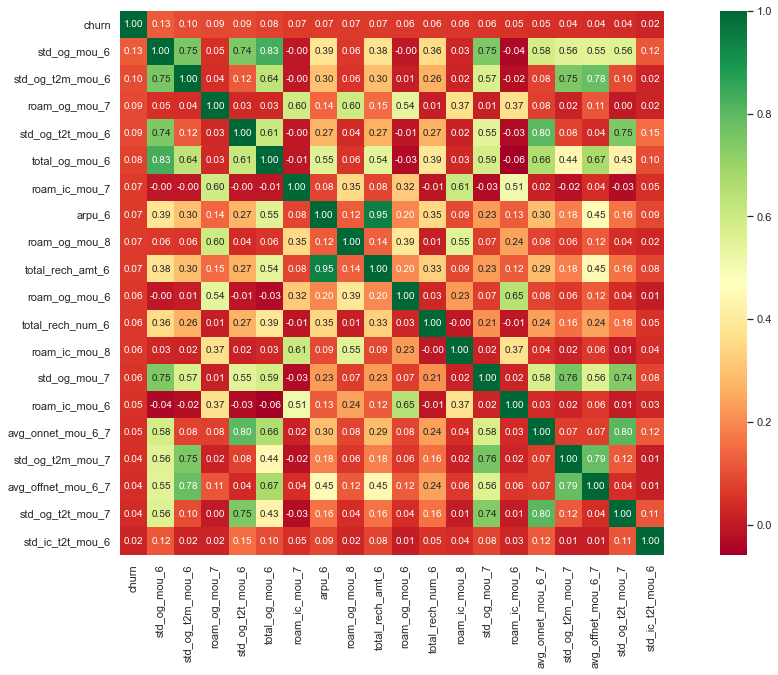

In [92]:
corr = hv.corr()

plt.figure(figsize=[20,10])

k = 20 # number of variables for the heatmap
cols = corr.nlargest(k,'churn')['churn'].index
corrmatrix = np.corrcoef(hv[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlGn')
plt.show()

Few Observations:
- std_og_t2m_mou_g has 75% correlation with std_og_mou_6
- std_og_t2t_mou_g has 74% correlation with std_og_mou_6
- total_og_mou_6 has 83% correlation with std_og_mou_6
- std_og_mou_7 has 75% correlation with std_og_mou_6
- std_og_t2t_mou_g has 74% correlation with avg_onnet_mou_6_7

## Outlier treatment

- We will perform outlier treatment using **capping** techniques where values above or below the 99th or 1st quantile are considered outliers.
- This method does not remove the data but may distort the distribution of the variablesAll the columns have skew and outliers. We will check for a few of those columns to compare pre and post outlier capping values

In [94]:
# Plots to check outliers
def fn_checkoutliers(df, col):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=40)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title('Boxplot')

    plt.show()

In [95]:
# Checking few columns before outlier capping
cols_check = ['arpu_6',
              'arpu_7',
              'arpu_8',
              'onnet_mou_8',
              'offnet_mou_8',
              'roam_ic_mou_6',
              'roam_ic_mou_7',
              'roam_ic_mou_8',
              'roam_og_mou_6',
              'roam_og_mou_7']

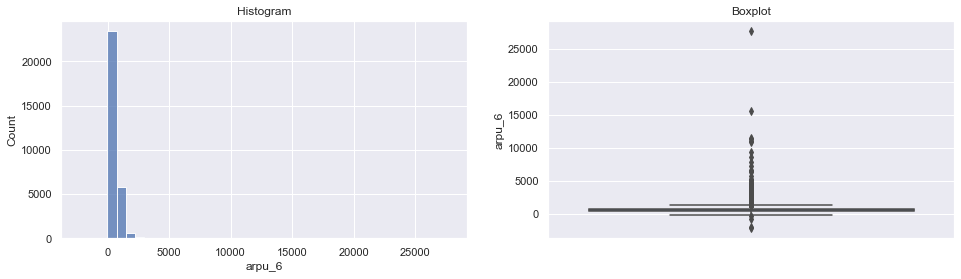

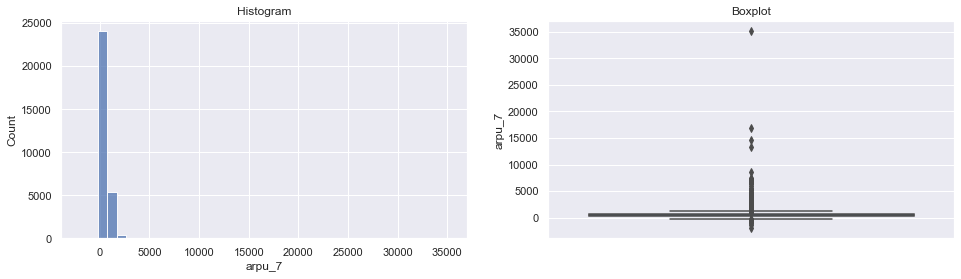

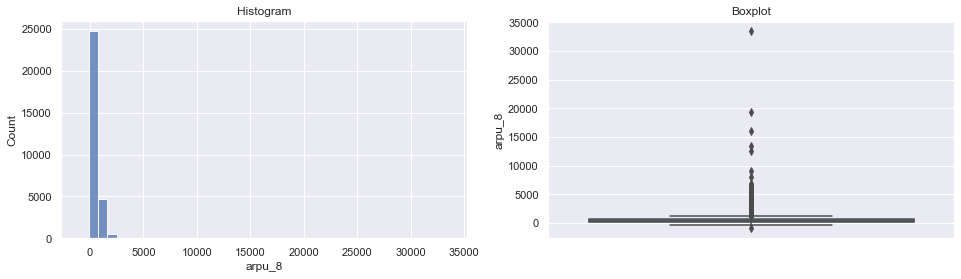

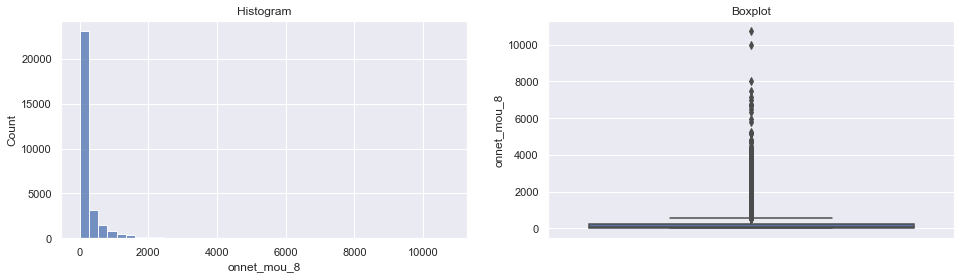

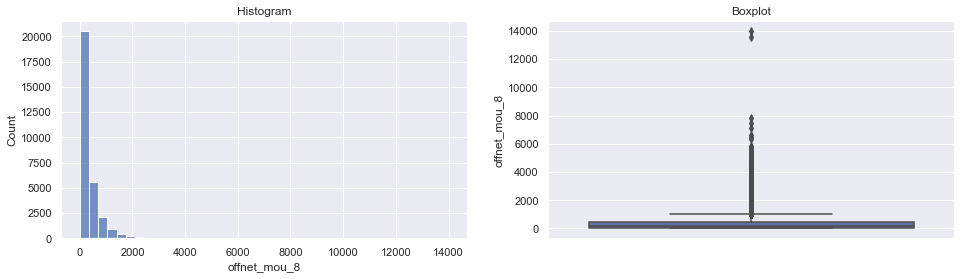

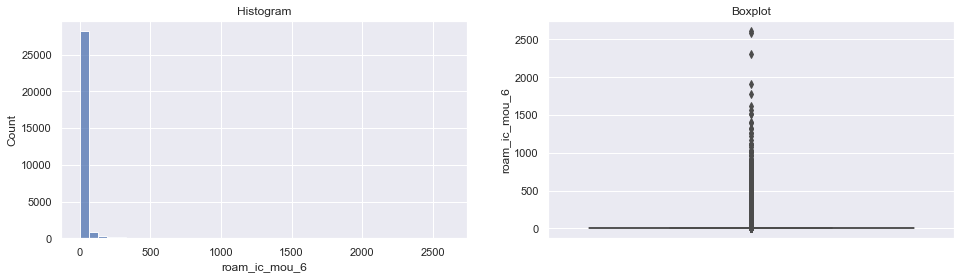

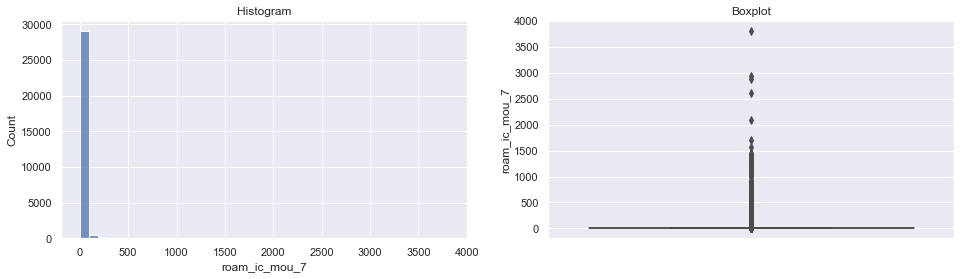

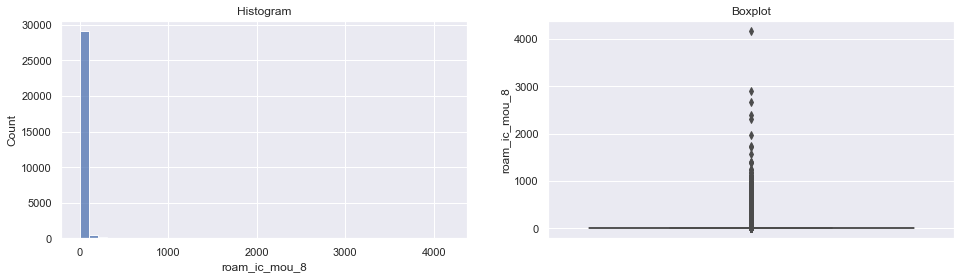

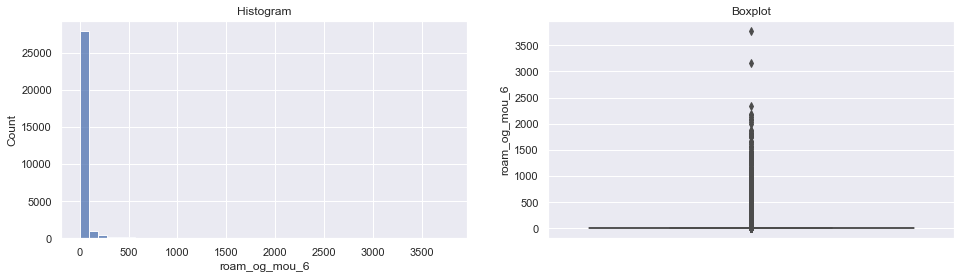

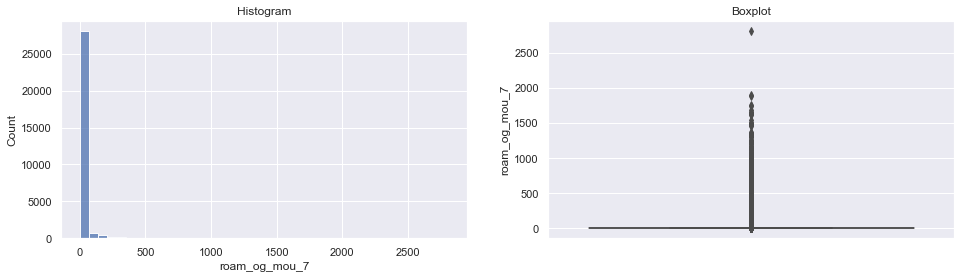

In [96]:
for each_col in cols_check:
    fn_checkoutliers(df=hv, col=each_col)

In [97]:
hv['arpu_6'].describe()

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64

In [98]:
# Getting list of columns
col_list = list(hv.columns)

In [99]:
# remove churn from column list
col_list.remove('churn')

In [100]:
len(col_list)

156

In [101]:
# Applying outlier capping for all applicable columns
for each_col in col_list:
    lb = hv[each_col].quantile(0.01)
    ub = hv[each_col].quantile(0.99)
    hv[each_col] = np.clip(hv[each_col], lb, ub)

In [102]:
hv['arpu_6'].describe()

count    30001.000000
mean       548.809784
std        358.130151
min          1.000000
25%        309.865000
50%        481.694000
75%        699.943000
max       1985.115000
Name: arpu_6, dtype: float64

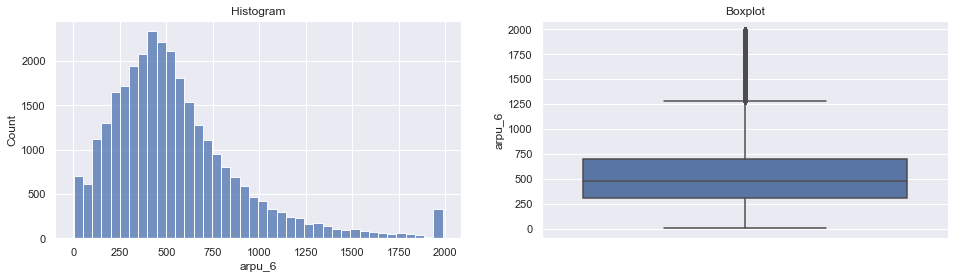

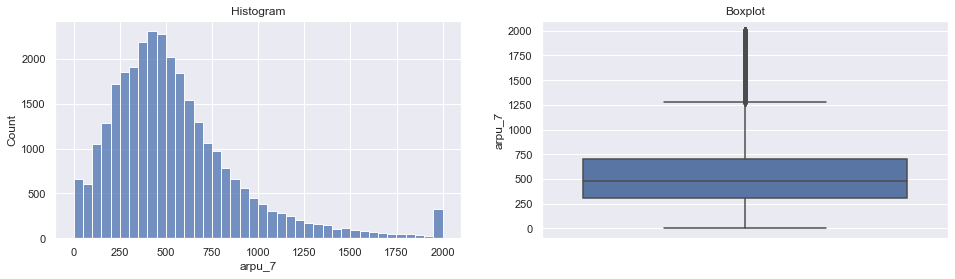

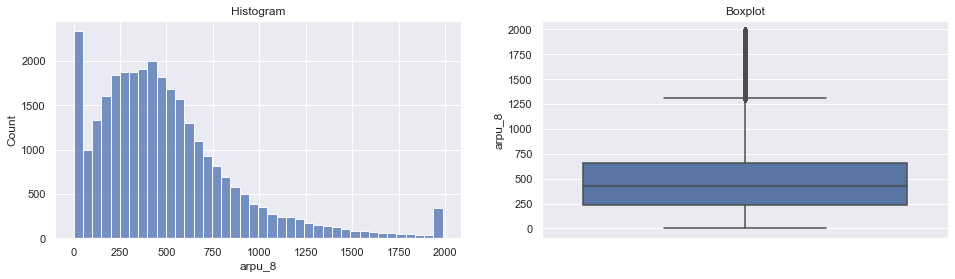

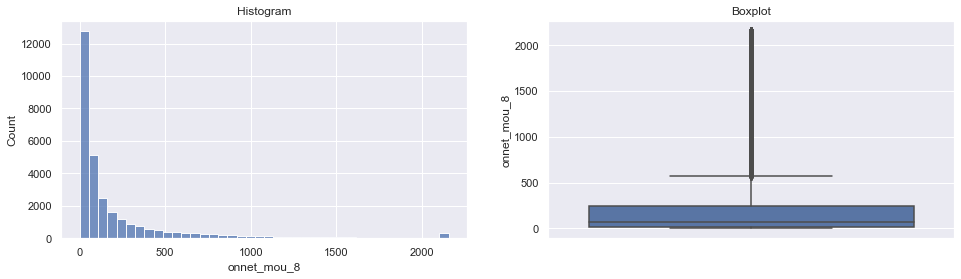

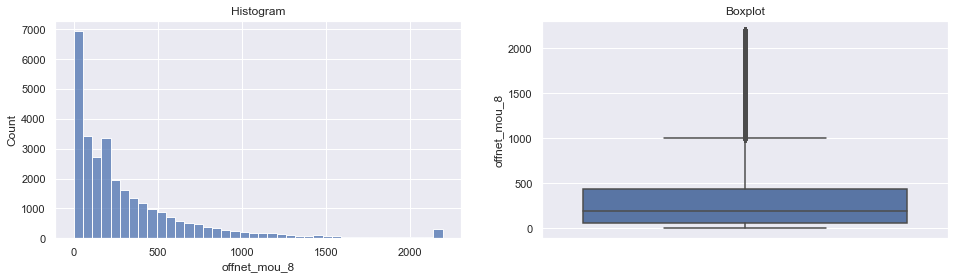

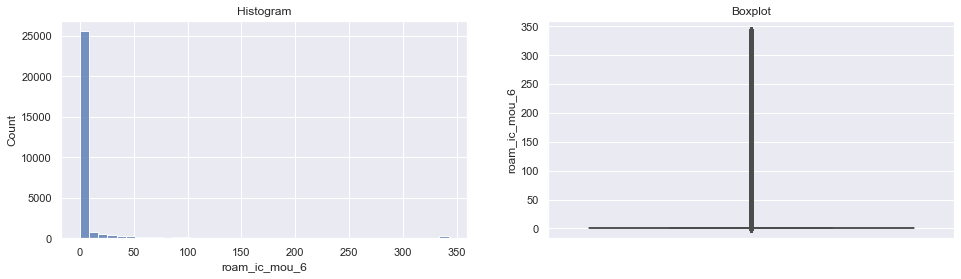

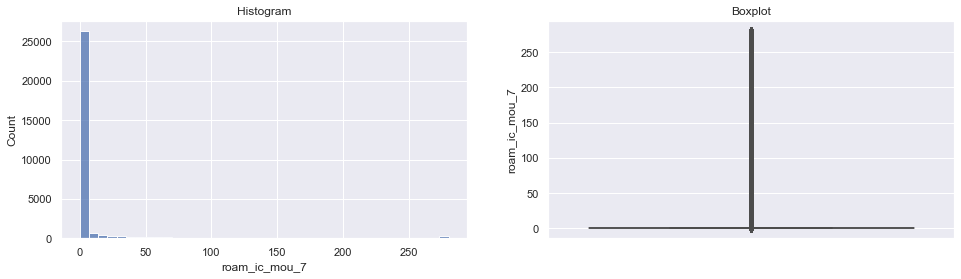

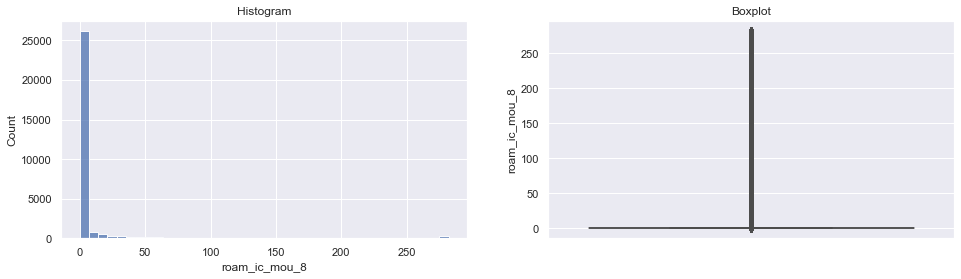

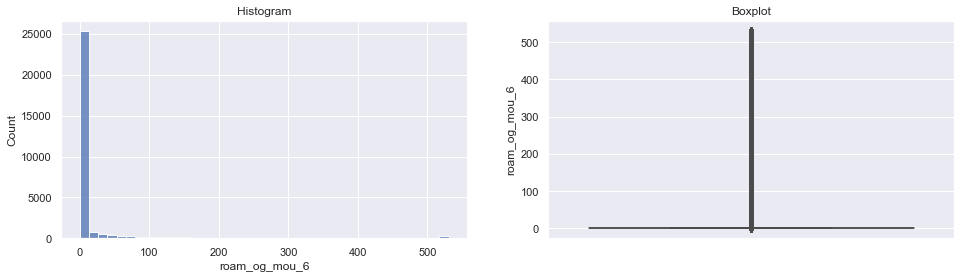

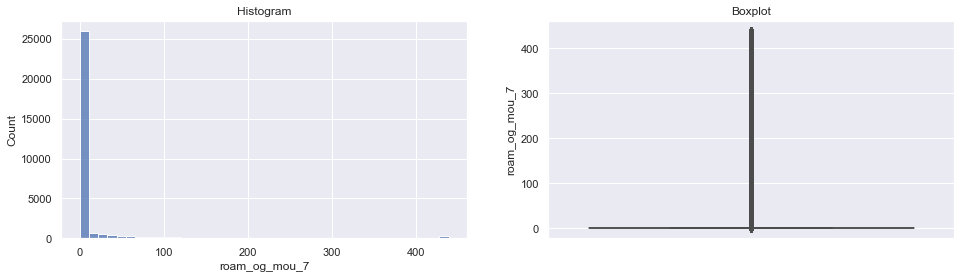

In [103]:
# Checking post outlier capping
for each_col in cols_check:
    fn_checkoutliers(df=hv, col=each_col)

## Train Test Split

In [104]:
# Add feature variables to X
X = hv.drop('churn', axis=1)
# Add response variable to y
y = hv['churn']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling (Min Max Scaler)

In [107]:
hv.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 157 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    arpu_6                     30001 non-null  float64
 1    arpu_7                     30001 non-null  float64
 2    arpu_8                     30001 non-null  float64
 3    onnet_mou_8                30001 non-null  float64
 4    offnet_mou_8               30001 non-null  float64
 5    roam_ic_mou_6              30001 non-null  float64
 6    roam_ic_mou_7              30001 non-null  float64
 7    roam_ic_mou_8              30001 non-null  float64
 8    roam_og_mou_6              30001 non-null  float64
 9    roam_og_mou_7              30001 non-null  float64
 10   roam_og_mou_8              30001 non-null  float64
 11   loc_og_t2t_mou_6           30001 non-null  float64
 12   loc_og_t2t_mou_7           30001 non-null  float64
 13   loc_og_t2t_mou_8           30

In [108]:
col_scale = list(hv.columns)
col_scale.remove('churn')
col_scale.remove('night_pck_user_6')
col_scale.remove('night_pck_user_7')
col_scale.remove('night_pck_user_8')
col_scale.remove('fb_user_6')
col_scale.remove('fb_user_8')

In [109]:
len(col_scale)

151

In [110]:
# Import sklearn library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
scaler = MinMaxScaler()

# Perform fit and transform on the X_train dataset
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Perform only transform on the X_test dataset
X_test[col_scale] = scaler.transform(X_test[col_scale])

## Handling class imbalance using SMOTE

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [113]:
# Class imbalance before SMOTE
y_train.value_counts(normalize=True)

0    0.919476
1    0.080524
Name: churn, dtype: float64

In [114]:
# Class imbalance after SMOTE
y_train_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: churn, dtype: float64

Class imbalance is not present and has been handled by SMOTE

# Interpretable models without PCA

We will create a **Logistic Regression** model without PCA to get interpretable results and actionable recommendations to the company on how the churn rate can be reduced

We have **156** features to start with building the base model

## Base Model

In [115]:
# Import library from statsmodels
import statsmodels.api as sm

In [116]:
logm1 = sm.GLM(y_train_smote, (sm.add_constant(X_train_smote)),  family=sm.families.Binomial())

In [117]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38463
Model Family:                Binomial   Df Model:                          154
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12742.
Date:                Tue, 07 Dec 2021   Deviance:                       25484.
Time:                        04:42:17   Pearson chi2:                 3.48e+05
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.6540      0.122      5.347      0.000       0.414       0.894
arpu_6                        0.1539      0.384      0.401      0.688      -0.598       0.906
arpu_7                        3.0018      0.394      7.624      0.000       2.230       3.773
arpu_8                        2.7369      0.425      6.437      0.000       1.904       3.570
onnet_mou_8                  -1.8244      1.047     -1.743      0.081      -3.876       0.228
offnet_mou_8                 -0.0649      0.899     -0.072      0.942      -1.828       1.698
roam_ic_mou_6                 0.0662      0.212      0.312      0.755      -0.350       0.482
roam_ic_mou_7                 0.3464      0.240      1.446      0.148      -0.123       0.816
roam_ic_mou_8                 0.1983      0.212      0.937      0.349      -0.216       0.613
roam_og_mou_6                -0.6546      0.227     -2.887      0.004      -1.099      -0.210
roam_og_mou_7                 0.6285      0.240      2.621      0.009       0.159       1.098
roam_og_mou_8                 0.7592      0.264      2.874      0.004       0.242       1.277
loc_og_t2t_mou_6             -0.1057      0.696     -0.152      0.879      -1.469       1.258
loc_og_t2t_mou_7             -3.0038      0.817     -3.679      0.000      -4.604      -1.403
loc_og_t2t_mou_8             -2.0531      1.123     -1.828      0.067      -4.254       0.148
loc_og_t2m_mou_6             -1.5707      0.697     -2.252      0.024      -2.938      -0.204
loc_og_t2m_mou_7             -4.2694      0.805     -5.306      0.000      -5.847      -2.692
loc_og_t2m_mou_8             -3.7587      1.267     -2.967      0.003      -6.241      -1.276
loc_og_t2f_mou_6             -0.2450      0.256     -0.959      0.338      -0.746       0.256
loc_og_t2f_mou_7             -1.2043      0.290     -4.152      0.000      -1.773      -0.636
loc_og_t2f_mou_8             -0.0062      0.294     -0.021      0.983      -0.581       0.569
loc_og_t2c_mou_6             -0.4148      0.141     -2.947      0.003      -0.691      -0.139
loc_og_t2c_mou_7             -0.5187      0.160     -3.236      0.001      -0.833      -0.205
loc_og_t2c_mou_8              0.3220      0.175      1.836      0.066      -0.022       0.666
loc_og_mou_6                  3.1097      1.351      2.302      0.021       0.461       5.758
loc_og_mou_7                  4.8368      1.516      3.191      0.001       1.866       7.808
loc_og_mou_8                 26.2645      2.168     12.117      0.000      22.016      30.513
std_og_t2t_mou_6              1.9932      0.610      3.267      0.001       0.797       3.189
std_og_t2t_mou_7             -2.2772      0.640     -3.558      0.000      -3.532      -1.023
std_og_t2t_mou_8             -6.2441      1.078     -5.790      0.000      

## Feature Selection using RFE

We will select 20 features using Recursive Feature elimination technique

In [118]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [119]:
logreg = LogisticRegression(random_state=100)

In [120]:
# Importing RFE from sklearn
from sklearn.feature_selection import RFE

In [121]:
# Selection of 20 features by RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_smote, y_train_smote)

In [122]:
# Looking at the feature names selected by RFE
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 94),
 ('arpu_7', True, 1),
 ('arpu_8', False, 54),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 107),
 ('roam_ic_mou_7', False, 69),
 ('roam_ic_mou_8', False, 118),
 ('roam_og_mou_6', False, 71),
 ('roam_og_mou_7', False, 98),
 ('roam_og_mou_8', False, 135),
 ('loc_og_t2t_mou_6', False, 109),
 ('loc_og_t2t_mou_7', False, 8),
 ('loc_og_t2t_mou_8', False, 31),
 ('loc_og_t2m_mou_6', False, 68),
 ('loc_og_t2m_mou_7', False, 7),
 ('loc_og_t2m_mou_8', False, 22),
 ('loc_og_t2f_mou_6', False, 95),
 ('loc_og_t2f_mou_7', False, 34),
 ('loc_og_t2f_mou_8', False, 111),
 ('loc_og_t2c_mou_6', False, 66),
 ('loc_og_t2c_mou_7', False, 80),
 ('loc_og_t2c_mou_8', False, 110),
 ('loc_og_mou_6', False, 27),
 ('loc_og_mou_7', False, 6),
 ('loc_og_mou_8', False, 30),
 ('std_og_t2t_mou_6', False, 61),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 3),
 ('std_og_t2m_mou_6', False, 88),
 ('std_og_t2m_mou_7', False, 23),
 ('std_og_t2m_mou_8',

In [123]:
# Get only the columns selected by RFE
col = X_train_smote.columns[ rfe.support_ ]

In [124]:
col

Index(['arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'sep_vbc_3g',
       'avg_onnet_mou_6_7'],
      dtype='object')

In [125]:
# Columns not selected by RFE
X_train_smote.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_6_combined',
       'total_rech_amt_7_combined', 'av_rech_amt_6_7', 'aon_years',
       'avg_offnet_mou_6_7', 'avg_count_rech_2g3g_6_7'],
      dtype='object', length=136)

## Model 2

In [126]:
X_train_sm = sm.add_constant(X_train_smote[col])

In [127]:
# Second model
logm2 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())

In [128]:
# Fitting the model
res = logm2.fit()

In [129]:
# Checking the summary of model statistics
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13951.
Date:                Tue, 07 Dec 2021   Deviance:                       27901.
Time:                        04:44:47   Pearson chi2:                 7.35e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6645      0.035     18.815      0.000       0.595       0.734
arpu_7                 2.9658      0.140     21.227      0.000       2.692       3.240
onnet_mou_8            2.1859      0.450      4.859      0.000       1.304       3.068
offnet_mou_8           5.1096      0.439     11.630      0.000       4.248       5.971
std_og_t2t_mou_7      -3.3650      0.237    -14.224      0.000      -3.829      -2.901
std_og_t2m_mou_8      -3.9389      0.546     -7.220      0.000      -5.008      -2.870
std_og_mou_7           2.3167      0.196     11.818      0.000       1.933       2.701
std_og_mou_8          10.6469      0.668     15.948      0.000       9.338      11.955
total_og_mou_8       -17.6168      0.663    -26.590      0.000     -18.915     -16.318
loc_ic_mou_7           2.5543      0.219     11.659      0.000       2.125       2.984
loc_ic_mou_8          18.9948      0.823     23.071      0.000      17.381      20.609
std_ic_mou_8           9.0332      0.362     24.929      0.000       8.323       9.743
total_ic_mou_8       -31.2314      0.992    -31.470      0.000     -33.177     -29.286
spl_ic_mou_8          -3.0738      0.191    -16.083      0.000      -3.448      -2.699
isd_ic_mou_8           5.5580      0.225     24.681      0.000       5.117       5.999
total_rech_num_8      -2.7951      0.127    -21.926      0.000      -3.045      -2.545
last_day_rch_amt_8    -2.5542      0.110    -23.319      0.000      -2.769      -2.340
max_rech_data_8       -2.7749      0.096    -28.819      0.000      -2.964      -2.586
vol_2g_mb_8           -2.9620      0.181    -16.322      0.000      -3.318      -2.606
sep_vbc_3g            -6.2966      0.491    -12.833      0.000      -7.258      -5.335
avg_onnet_mou_6_7      2.8237      0.200     14.145      0.000       2.432       3.215
======================================================================================
"""

### Check VIFs

In [130]:
# import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# Create a dataframe that contains the names of all the feature variables and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
7,total_og_mou_8,31.13
11,total_ic_mou_8,26.74
6,std_og_mou_8,22.70
9,loc_ic_mou_8,22.55
2,offnet_mou_8,16.96
1,onnet_mou_8,15.30
4,std_og_t2m_mou_8,15.23
3,std_og_t2t_mou_7,10.00
19,avg_onnet_mou_6_7,7.93
5,std_og_mou_7,6.93


We wil be dropping columns with VIF over 10 first

In [132]:
col = col.drop('total_og_mou_8', 1)
col = col.drop('total_ic_mou_8', 1)
col = col.drop('std_og_mou_8', 1)
col = col.drop('loc_ic_mou_8', 1)
col = col.drop('offnet_mou_8', 1)
col = col.drop('onnet_mou_8', 1)
col = col.drop('std_og_t2m_mou_8', 1)
col = col.drop('std_og_t2t_mou_7', 1)
len(col)

12

## Model 3

In [133]:
X_train_sm = sm.add_constant(X_train_smote[col])
logm3 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17687.
Date:                Tue, 07 Dec 2021   Deviance:                       35374.
Time:                        04:44:50   Pearson chi2:                 6.05e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8365      0.028     65.072      0.000       1.781       1.892
arpu_7                 2.2770      0.109     20.975      0.000       2.064       2.490
std_og_mou_7           0.6749      0.096      6.995      0.000       0.486       0.864
loc_ic_mou_7          -3.2939      0.109    -30.262      0.000      -3.507      -3.081
std_ic_mou_8          -2.7600      0.154    -17.903      0.000      -3.062      -2.458
spl_ic_mou_8          -3.7728      0.196    -19.255      0.000      -4.157      -3.389
isd_ic_mou_8          -0.7038      0.152     -4.628      0.000      -1.002      -0.406
total_rech_num_8      -6.9917      0.124    -56.426      0.000      -7.235      -6.749
last_day_rch_amt_8    -4.2431      0.101    -42.202      0.000      -4.440      -4.046
max_rech_data_8       -2.4858      0.085    -29.277      0.000      -2.652      -2.319
vol_2g_mb_8           -3.5790      0.182    -19.629      0.000      -3.936      -3.222
sep_vbc_3g            -7.3219      0.558    -13.119      0.000      -8.416      -6.228
avg_onnet_mou_6_7     -0.1254      0.086     -1.460      0.144      -0.294       0.043
======================================================================================
"""

### Check VIFs

In [134]:
# Create a dataframe that contains the names of all the feature variables and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,arpu_7,4.79
1,std_og_mou_7,3.06
6,total_rech_num_8,2.27
11,avg_onnet_mou_6_7,2.23
2,loc_ic_mou_7,1.81
7,last_day_rch_amt_8,1.75
8,max_rech_data_8,1.64
3,std_ic_mou_8,1.29
9,vol_2g_mb_8,1.24
5,isd_ic_mou_8,1.09


We will be dropping "avg_onnet_mou_6_7" which has a p-value of 0.144. We need to remove p-values above 0.05

In [135]:
col = col.drop('avg_onnet_mou_6_7', 1)
len(col)

11

## Model 4

In [136]:
X_train_sm = sm.add_constant(X_train_smote[col])
logm4 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38606
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17688.
Date:                Tue, 07 Dec 2021   Deviance:                       35376.
Time:                        04:44:51   Pearson chi2:                 6.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8301      0.028     65.676      0.000       1.776       1.885
arpu_7                 2.2679      0.108     20.936      0.000       2.056       2.480
std_og_mou_7           0.6073      0.084      7.191      0.000       0.442       0.773
loc_ic_mou_7          -3.2994      0.109    -30.332      0.000      -3.513      -3.086
std_ic_mou_8          -2.7490      0.154    -17.875      0.000      -3.050      -2.448
spl_ic_mou_8          -3.7581      0.195    -19.228      0.000      -4.141      -3.375
isd_ic_mou_8          -0.6990      0.152     -4.600      0.000      -0.997      -0.401
total_rech_num_8      -6.9914      0.124    -56.425      0.000      -7.234      -6.749
last_day_rch_amt_8    -4.2487      0.101    -42.262      0.000      -4.446      -4.052
max_rech_data_8       -2.4759      0.085    -29.263      0.000      -2.642      -2.310
vol_2g_mb_8           -3.5718      0.182    -19.608      0.000      -3.929      -3.215
sep_vbc_3g            -7.3101      0.558    -13.103      0.000      -8.404      -6.217
======================================================================================
"""

### Check VIFs

In [137]:
# Create a dataframe that contains the names of all the feature variables and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,arpu_7,4.70
1,std_og_mou_7,2.41
6,total_rech_num_8,2.26
2,loc_ic_mou_7,1.80
7,last_day_rch_amt_8,1.74
8,max_rech_data_8,1.64
3,std_ic_mou_8,1.29
9,vol_2g_mb_8,1.24
5,isd_ic_mou_8,1.09
4,spl_ic_mou_8,1.07


All p-values are less than 0.05 and all VIF values are less than 5. We will use this model for evaluation

## Model Evaluation

In [138]:
X_train_sm.shape

(38618, 12)

In [139]:
# Predicting probabilities on the Train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.50743813, 0.15675706, 0.4174575 , 0.22792293, 0.31610485,
       0.10395573, 0.11254123, 0.1553401 , 0.38128159, 0.51513441])

## Create a dataframe with y_train (target value) and y_train_pred (predicted probability)

In [140]:
y_train_pred_final = pd.DataFrame({"Converted": y_train_smote.values, "Conversion_Prob": y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.507438
1,0,0.156757
2,0,0.417457
3,0,0.227923
4,0,0.316105


## Create new column "Predicted" with 1 if 'Conversion_Prob' > 0.5 else 0

In [141]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.507438,1
1,0,0.156757,0
2,0,0.417457,0
3,0,0.227923,0
4,0,0.316105,0


## Metrics Evaluation

In [142]:
# For evaluation metrics, import metrics from sklearn
from sklearn import metrics

In [143]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7983323838624475


In [144]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[14801  4508]
 [ 3280 16029]]


| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 14801   | 4508 |
| Converted | 3280     | 16029 |

In [145]:
# Evaluation of other metrics than accuracy

TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [146]:
# Calculating Sensitivity of the model
TP / (TP + FN)

0.8301310269822363

In [147]:
# Calculating Specificity of the model
TN / (TN + FP)

0.7665337407426589

In [148]:
# Calculating False Positive rate (i.e. Predicting Churn when the Customer has not Churned)
print(FP / float(TN + FP))

0.23346625925734113


In [149]:
# Calculating Positive Predictive rate (i.e. Rate of identifying Actual Churn as Churn) (also called "Precision")
print(TP / float(TP + FP))

0.7804937430004383


In [150]:
# Calculating Negative Predictive rate (i.e. Rate of identifying Actual Non-Churn as Non-Churn)
print(TN / float(TN + FN))

0.81859410430839


## Plotting ROC curve

An ROC (Receiver Operating Characteristic) curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

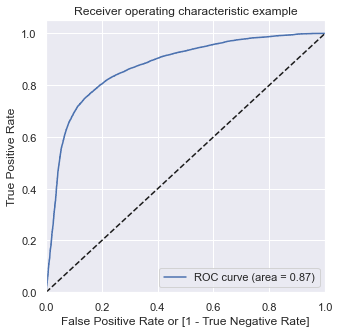

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We have the Area Under the Curve as 0.87 which is a good model. So, we will go ahead and find the Optimal Cut-off Point based on Sensivitivity V/S Specificity trade-off

## Finding the Optimal cut-off point

Since 0.5 is an arbitrary cut-off chosen by us, we want to find the Optimal cut-off point where sensitivity and specificity are balanced

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.507438,1,1,1,1,1,1,1,0,0,0,0
1,0,0.156757,0,1,1,0,0,0,0,0,0,0,0
2,0,0.417457,0,1,1,1,1,1,0,0,0,0,0
3,0,0.227923,0,1,1,1,0,0,0,0,0,0,0
4,0,0.316105,0,1,1,1,1,0,0,0,0,0,0


In [155]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.507438,1,1,1,1,1,1,1,0,0,0,0
1,0,0.156757,0,1,1,0,0,0,0,0,0,0,0
2,0,0.417457,0,1,1,1,1,1,0,0,0,0,0
3,0,0.227923,0,1,1,1,0,0,0,0,0,0,0
4,0,0.316105,0,1,1,1,1,0,0,0,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.646434  0.974727  0.318142
0.2   0.2  0.703765  0.941374  0.466156
0.3   0.3  0.745197  0.912424  0.577969
0.4   0.4  0.774561  0.873945  0.675177
0.5   0.5  0.798332  0.830131  0.766534
0.6   0.6  0.804728  0.765809  0.843648
0.7   0.7  0.794371  0.684810  0.903931
0.8   0.8  0.732638  0.514164  0.951111
0.9   0.9  0.536045  0.079548  0.992542


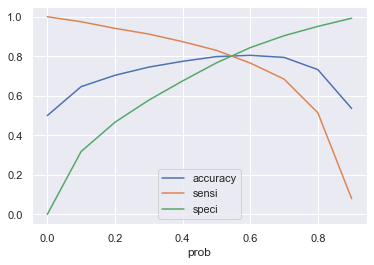

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We can see that the optimum cut-off point lies between 0.5 and 0.6. To find the exact cut-off, we will check various cut-off points between 0.5 and 0.6

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.507438,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.156757,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.417457,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.227923,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.316105,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.798332  0.830131  0.766534
0.51  0.51  0.799808  0.824641  0.774975
0.52  0.52  0.801310  0.818996  0.783624
0.53  0.53  0.801958  0.812264  0.791652
0.54  0.54  0.802242  0.805635  0.798850
0.55  0.55  0.803641  0.799679  0.807603
0.56  0.56  0.803667  0.792791  0.814542
0.57  0.57  0.804081  0.786473  0.821689
0.58  0.58  0.804444  0.779636  0.829251
0.59  0.59  0.804573  0.772956  0.836190


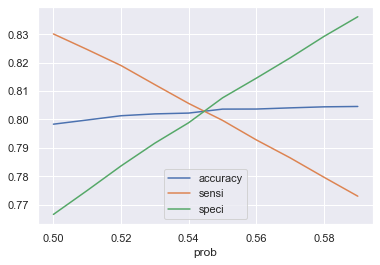

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## 0.54 is the closest optimal cut-off point based on the intersection values in above curve

In [161]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,Final_Predicted
0,0,0.507438,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.156757,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.417457,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.227923,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.316105,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8022424776011187

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[15425,  3884],
       [ 3753, 15556]], dtype=int64)

| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 15425   | 3884 |
| Converted | 3753     | 15556 |

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8056346781293697

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.7988502770728676

In [167]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20114972292713243


In [168]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8002057613168724


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8043070184586505


## Precision and Recall

In [170]:
# Creating a confusion matrix
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

array([[14801,  4508],
       [ 3280, 16029]], dtype=int64)

| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 14801   | 4508 |
| Converted | 3280     | 16029 |

In [171]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7804937430004383

In [172]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8301310269822363

## Precision and Recall trade-off

In [173]:
# Import precision_recall_curve from sklearn
from sklearn.metrics import precision_recall_curve

In [174]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

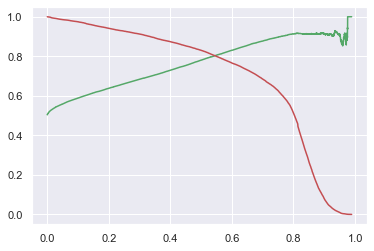

In [175]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Even with Precision and Recall, we get the optimal cut-off at 0.54

## Making Predictions on the test set

In [176]:
X_test = X_test[col]
X_test.head()

,arpu_7,std_og_mou_7,loc_ic_mou_7,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,sep_vbc_3g
20296,0.268599,0.003923,0.035190,0.006748,0.0,0.000000,0.088889,0.254867,0.000000,0.000000,0.0
8279,0.103812,0.002763,0.037296,0.029866,0.0,0.000000,0.155556,0.000000,0.054945,0.120622,0.0
72269,0.360767,0.061603,0.274261,0.088263,0.0,0.000975,0.177778,0.230088,0.000000,0.000000,0.0
65602,0.243245,0.039689,0.176167,0.010623,0.0,0.000000,0.511111,0.053097,0.000000,0.000000,0.0
42758,0.201144,0.134716,0.179224,0.000000,0.0,0.043641,0.044444,0.000000,0.000000,0.000000,0.0


In [177]:
# Adding intercept to the test set
X_test_sm = sm.add_constant(X_test)

In [178]:
y_test_pred = res.predict(X_test_sm)

In [179]:
y_test_pred[:10]

20296    0.646274
8279     0.551730
72269    0.335597
65602    0.118833
42758    0.807765
80210    0.087171
67925    0.307991
25034    0.215035
10422    0.127156
43140    0.588357
dtype: float64

In [180]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [181]:
# Let's see the head
y_pred_1.head()

,0
20296,0.646274
8279,0.551730
72269,0.335597
65602,0.118833
42758,0.807765


In [182]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [183]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [184]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [185]:
y_pred_final.head()

,churn,0
0,1,0.646274
1,1,0.551730
2,0,0.335597
3,0,0.118833
4,1,0.807765


In [186]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

y_pred_final.head()

,churn,Conversion_Prob
0,1,0.646274
1,1,0.551730
2,0,0.335597
3,0,0.118833
4,1,0.807765


In [187]:
# As optimal cut-off point is 0.54 (where "Sensitivity" and "Specificity" intersect)
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.54 else 0)

In [188]:
y_pred_final.head()

,churn,Conversion_Prob,Final_Predicted
0,1,0.646274,1
1,1,0.551730,1
2,0,0.335597,0
3,0,0.118833,0
4,1,0.807765,1


In [189]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.Final_Predicted)

0.7988001333185202

In [190]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.Final_Predicted )
confusion2

array([[6604, 1647],
       [ 164,  586]], dtype=int64)

| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 6604   | 1647 |
| Converted | 164     | 586 |

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7813333333333333

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.8003878317779664

## Plot test ROC curve

In [194]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.Conversion_Prob, drop_intermediate = False )

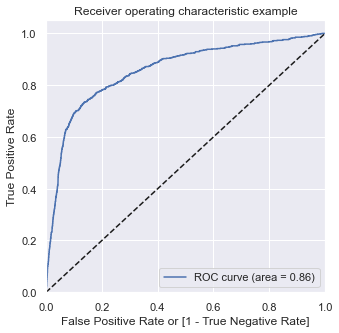

In [195]:
draw_roc(y_pred_final.churn, y_pred_final.Conversion_Prob)

We have the Area Under the Curve as 0.86 which is a good model

## Model Performance

| Train/Test | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Train | 0.8022  | 0.8056 | 0.7988 | 
| Test  | 0.7988  | 0.7813 | 0.8003 |

- AUC score of train model is 0.87
- AUC score of test model is 0.86
> The AUC scores are good for both and test and so we have built a good model

In [196]:
# Looking at the results of final model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38606
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17688.
Date:                Tue, 07 Dec 2021   Deviance:                       35376.
Time:                        04:44:57   Pearson chi2:                 6.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8301      0

## Recommendations to manage Customer churn

For this telecom company, it's more important to identify churners than non-churners. This is because to reduce churn, customer retention is the most important criterion than anything else. <br>
So, we will have to choose **Sensitivity/Recall** as our evaluation metric as it measures the proportion of actual positives that were correctly identified. <br>
The following important predictor attributes are indicators of churn. Keep note of the following:
1. The number of recharges, amount of recharge and the last day of recharge are important indicators of customer usage. If any of them decrease, it could be a sign that the customer is trying to wait the remaining period of validity and then try to switch providers. Recharge packs with discount can be offered during this period to retain customer.
2. Internet usage is also an important variable as it indicates if the customer is actively using the mobile for operations such as social networking, mobile banking, bill payments etc., and any reduction/non-usage indicates higher possibility of churn. Data Packs can be offered as a bundle/reduced prices/free for a month to attract customer to be in the network. 
3. Incoming and Outgoing calls in the last good month 7 and action phase month 8 also need to be taken into consideration
4. STD, ISD & Special incoming calls for month 8 need to monitored for usage consistently and see if we are able to identify any drop in the usage pattern
5. Depending on the volume based cost for 8th month, we can observe if the customer is making a commitment to stay further on the network through month 9
6. Average revenue per user should also be monitored for reduction in consumption which would indicate potential customer churn

## Important indicators of customer churn

| Important Features | Coefficients | Column Information |
| --- | --- | --- |
| arpu_7    |              2.2679  |   Average revenue per use for month 7  |
| std_og_mou_7    |        0.6073  |   STD outgoing calls minutes of usage for month 7  |
| loc_ic_mou_7     |      -3.2994  |   Local incoming calls minutes of usage for month 7  |
| std_ic_mou_8   |        -2.7490  |   STD incoming calls minutes of usage for month 8 |
| spl_ic_mou_8    |       -3.7581  |   Special incoming calls minutes of usage for month 8  |
| isd_ic_mou_8   |        -0.6990  |   ISD incoming calls minutes of usage for month 8  |
| total_rech_num_8    |   -6.9914  |   Total number of recharges done for month 8  |
| last_day_rch_amt_8  |   -4.2487  |   Total amount recharged on the last date of month 8  |
| max_rech_data_8    |    -2.4759  |   Maximum data recharge for month 8  |
| vol_2g_mb_8    |        -3.5718  |   Mobile internet usage volume (in MB) for 2G in month 8  |
| sep_vbc_3g      |       -7.3101  |   Volume based cost for september (month 8)  |

# Non-interpretable models using PCA

## Train Test Split

In [197]:
# Add feature variables to X
X = hv.drop('churn', axis=1)
# Add response variable to y
y = hv['churn']

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling (Min Max Scaler)

In [200]:
hv.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 157 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    arpu_6                     30001 non-null  float64
 1    arpu_7                     30001 non-null  float64
 2    arpu_8                     30001 non-null  float64
 3    onnet_mou_8                30001 non-null  float64
 4    offnet_mou_8               30001 non-null  float64
 5    roam_ic_mou_6              30001 non-null  float64
 6    roam_ic_mou_7              30001 non-null  float64
 7    roam_ic_mou_8              30001 non-null  float64
 8    roam_og_mou_6              30001 non-null  float64
 9    roam_og_mou_7              30001 non-null  float64
 10   roam_og_mou_8              30001 non-null  float64
 11   loc_og_t2t_mou_6           30001 non-null  float64
 12   loc_og_t2t_mou_7           30001 non-null  float64
 13   loc_og_t2t_mou_8           30

In [201]:
col_scale = list(hv.columns)
col_scale.remove('churn')
col_scale.remove('night_pck_user_6')
col_scale.remove('night_pck_user_7')
col_scale.remove('night_pck_user_8')
col_scale.remove('fb_user_6')
col_scale.remove('fb_user_8')

In [202]:
len(col_scale)

151

In [203]:
# Import sklearn library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
scaler = MinMaxScaler()

# Perform fit and transform on the X_train dataset
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Perform only transform on the X_test dataset
X_test[col_scale] = scaler.transform(X_test[col_scale])

## Handling class imbalance using SMOTE

In [204]:
from imblearn.over_sampling import SMOTE

In [205]:
smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [206]:
# Class imbalance before SMOTE
y_train.value_counts(normalize=True)

0    0.919476
1    0.080524
Name: churn, dtype: float64

In [207]:
# Class imbalance after SMOTE
y_train_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: churn, dtype: float64

Class imbalance is not present and has been handled by SMOTE

## Applying PCA on the dataset

In [208]:
from sklearn.decomposition import PCA

In [209]:
# Initializing PCA
pca = PCA(random_state=100)

In [210]:
# Fitting PCA on the train dataset
pca.fit(X_train_smote)

PCA(random_state=100)

### Components from PCA

In [211]:
pca.components_[:2, :2]

array([[-0.05770479, -0.04519673],
       [ 0.14032053,  0.18406143]])

In [212]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([2.12978381e-01, 1.00015143e-01, 6.56619868e-02, 6.08405421e-02,
       4.36336941e-02, 3.36119974e-02, 2.90378999e-02, 2.76718170e-02,
       2.58826281e-02, 2.33925243e-02, 2.23241305e-02, 1.69694211e-02,
       1.37781683e-02, 1.30242689e-02, 1.26785332e-02, 1.16812658e-02,
       1.13008793e-02, 1.07991247e-02, 1.06989340e-02, 1.00814335e-02,
       9.74700074e-03, 9.26389718e-03, 8.82832814e-03, 8.69889124e-03,
       8.03654884e-03, 7.22554367e-03, 7.12740302e-03, 6.89480784e-03,
       6.50397454e-03, 6.16542893e-03, 5.98385047e-03, 5.12402926e-03,
       4.98454660e-03, 4.93311351e-03, 4.90052173e-03, 4.74092361e-03,
       4.66236745e-03, 4.53343507e-03, 4.28584401e-03, 4.08388435e-03,
       3.99719391e-03, 3.72936850e-03, 3.56985319e-03, 3.50614148e-03,
       3.48054333e-03, 3.43229589e-03, 3.31871687e-03, 3.28336785e-03,
       3.22761312e-03, 3.12169026e-03, 2.98066187e-03, 2.84092176e-03,
       2.76521882e-03, 2.72795190e-03, 2.68188246e-03, 2.47179787e-03,
      

In [213]:
# Make a Scree Plot for the explained variance
var_cum = np.cumsum(pca.explained_variance_ratio_)
var_cum

array([0.21297838, 0.31299352, 0.37865551, 0.43949605, 0.48312975,
       0.51674175, 0.54577965, 0.57345146, 0.59933409, 0.62272661,
       0.64505074, 0.66202017, 0.67579833, 0.6888226 , 0.70150114,
       0.7131824 , 0.72448328, 0.73528241, 0.74598134, 0.75606277,
       0.76580977, 0.77507367, 0.783902  , 0.79260089, 0.80063744,
       0.80786298, 0.81499039, 0.82188519, 0.82838917, 0.8345546 ,
       0.84053845, 0.84566248, 0.85064702, 0.85558014, 0.86048066,
       0.86522158, 0.86988395, 0.87441739, 0.87870323, 0.88278711,
       0.88678431, 0.89051368, 0.89408353, 0.89758967, 0.90107021,
       0.90450251, 0.90782123, 0.91110459, 0.91433221, 0.9174539 ,
       0.92043456, 0.92327548, 0.9260407 , 0.92876865, 0.93145053,
       0.93392233, 0.93633395, 0.93847312, 0.94048382, 0.94247702,
       0.94439025, 0.94622543, 0.94804651, 0.94979848, 0.95150055,
       0.95318937, 0.95478069, 0.95635065, 0.95785608, 0.95935221,
       0.96082891, 0.96228111, 0.9636828 , 0.96502759, 0.96633

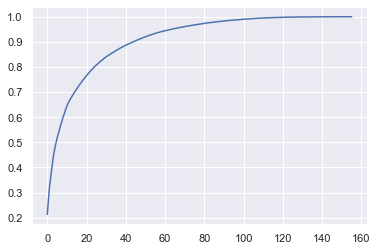

In [214]:
# Plot the Scree Plot
plt.plot(var_cum)
plt.show()

It's between 40-80 features that explain 95% of the variance. To get the right number, we will try a more unsupervised approach to PCA

In [215]:
# Initializing PCA to capture 90% variance
pca = PCA(0.90, random_state=100)

In [216]:
train_pca = pca.fit_transform(X_train_smote)

In [217]:
train_pca.shape

(38618, 45)

The model has chosen 45 components to explain 90% variance

In [218]:
corrmat = np.corrcoef(train_pca.transpose())

In [219]:
corrmat.shape

(45, 45)

### Plotting heatmap of the correlation matrix

We are expecting PCA to return components that are NOT multi-collinear. The heatmap will confirm this.

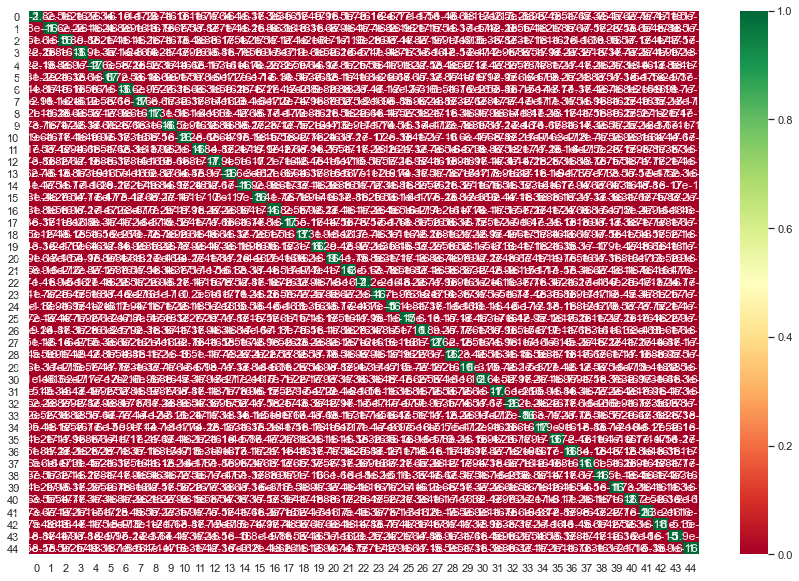

In [220]:
plt.figure(figsize=[15,10])
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')
plt.show()

As all the values are in red (except the diagonals), we can confirm that the PCA components do not exhibit multi collinearity

### Applying the transformation on the test set

In [221]:
test_pca = pca.transform(X_test)

## Logistic Regression with PCA

In [222]:
# Initializing logistic regression model for PCA
learner_pca = LogisticRegression(random_state=100)

In [223]:
model_pca = learner_pca.fit(train_pca, y_train_smote)

In [224]:
# Predicting on the Train set
y_train_pred = model_pca.predict_proba(train_pca)[:,1]

### Model Evaluation on train

### Create a dataframe with y_train (target value) and y_train_pred (predicted probability)

In [225]:
y_train_pred_final = pd.DataFrame({"Converted": y_train_smote.values, "Conversion_Prob": y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.792994
1,0,0.095658
2,0,0.344088
3,0,0.004269
4,0,0.068449


### Create new column "Predicted" with 1 if 'Conversion_Prob' > 0.5 else 0

In [226]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.792994,1
1,0,0.095658,0
2,0,0.344088,0
3,0,0.004269,0
4,0,0.068449,0


### Initial Metrics Evaluation on train

In [227]:
# For evaluation metrics, import metrics from sklearn
from sklearn import metrics

In [228]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8332642809052774


In [229]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[15783  3526]
 [ 2913 16396]]


| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 15783         | 3526 |
| Converted | 2913       | 16396 |

In [230]:
# Evaluation of other metrics than accuracy

TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [231]:
# Calculating Sensitivity of the model
TP / (TP + FN)

0.8491377078046507

In [232]:
# Calculating Specificity of the model
TN / (TN + FP)

0.8173908540059039

### Plotting ROC curve

In [233]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

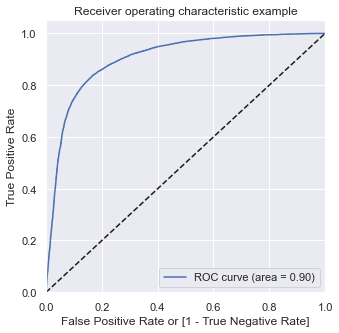

In [234]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We have the Area Under the Curve as 0.90 which is a good model. So, we will go ahead and find the Optimal Cut-off Point based on Sensivitivity V/S Specificity trade-off

### Finding the Optimal cut-off point

Since 0.5 is an arbitrary cut-off chosen by us, we want to find the Optimal cut-off point where sensitivity and specificity are balanced

In [235]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.792994,1,1,1,1,1,1,1,1,1,0,0
1,0,0.095658,0,1,0,0,0,0,0,0,0,0,0
2,0,0.344088,0,1,1,1,1,0,0,0,0,0,0
3,0,0.004269,0,1,0,0,0,0,0,0,0,0,0
4,0,0.068449,0,1,0,0,0,0,0,0,0,0,0


In [236]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.792994,1,1,1,1,1,1,1,1,1,0,0
1,0,0.095658,0,1,0,0,0,0,0,0,0,0,0
2,0,0.344088,0,1,1,1,1,0,0,0,0,0,0
3,0,0.004269,0,1,0,0,0,0,0,0,0,0,0
4,0,0.068449,0,1,0,0,0,0,0,0,0,0,0


In [237]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.700917  0.978352  0.423481
0.2   0.2  0.764229  0.953597  0.574861
0.3   0.3  0.801207  0.923921  0.678492
0.4   0.4  0.821197  0.889119  0.753276
0.5   0.5  0.833264  0.849138  0.817391
0.6   0.6  0.832902  0.796727  0.869077
0.7   0.7  0.819178  0.728676  0.909679
0.8   0.8  0.777901  0.613962  0.941841
0.9   0.9  0.632969  0.289761  0.976177


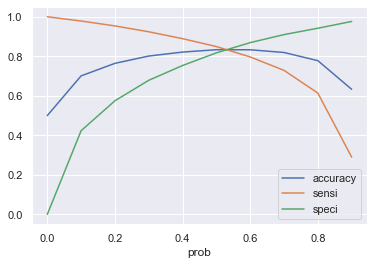

In [238]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We can see that the optimum cut-off point lies between 0.5 and 0.6. To find the exact cut-off, we will check various cut-off points between 0.5 and 0.6

In [239]:
# Let's create columns with different probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.792994,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
1,0,0.095658,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.344088,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.004269,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.068449,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [240]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.833264  0.849138  0.817391
0.51  0.51  0.833601  0.845098  0.822104
0.52  0.52  0.834585  0.840800  0.828370
0.53  0.53  0.834844  0.836190  0.833497
0.54  0.54  0.834740  0.831374  0.838107
0.55  0.55  0.834481  0.826040  0.842923
0.56  0.56  0.834740  0.821120  0.848361
0.57  0.57  0.834274  0.815526  0.853022
0.58  0.58  0.833963  0.809622  0.858304
0.59  0.59  0.833704  0.803770  0.863639


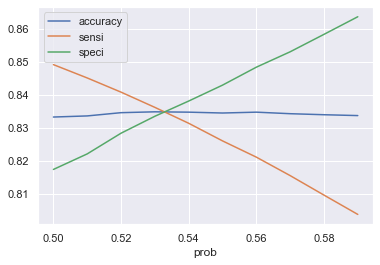

In [241]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### 0.53 is the closest optimal cut-off point based on the intersection values in above curve

In [242]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,Final_Predicted
0,0,0.792994,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
1,0,0.095658,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.344088,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.004269,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.068449,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Merics Evaluation on train - optimal

In [243]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8348438551970584

In [244]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[16094,  3215],
       [ 3163, 16146]], dtype=int64)

| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 16094   | 3215 |
| Converted | 3163     | 16146 |

In [245]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [246]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8361903775441504

In [247]:
# Let us calculate specificity
TN / float(TN+FP)

0.8334973328499663

### Model Evaluation on test

In [248]:
# Predicting on the test set
y_test_pred = model_pca.predict_proba(test_pca)[:,1]

In [249]:
y_test_pred_final = pd.DataFrame({"Converted": y_test, "Conversion_Prob": y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Prob
20296,1,0.684487
8279,1,0.526651
72269,0,0.169044
65602,0,0.355617
42758,1,0.807849


In [250]:
# As optimal cut-off point is 0.53 (where "Sensitivity" and "Specificity" intersect)
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.53 else 0)

In [251]:
y_test_pred_final.head()

,Converted,Conversion_Prob,Final_Predicted
20296,1,0.684487,1
8279,1,0.526651,0
72269,0,0.169044,0
65602,0,0.355617,0
42758,1,0.807849,1


### Metrics Evaluation on test

In [252]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.8386845906010443

In [253]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
confusion2

array([[6940, 1311],
       [ 141,  609]], dtype=int64)

| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 6940   | 1311 |
| Converted | 141     | 609 |

In [254]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [255]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.812

In [256]:
# Let us calculate specificity
TN / float(TN+FP)

0.8411101684644285

### Plot test ROC curve

In [257]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob, drop_intermediate = False )

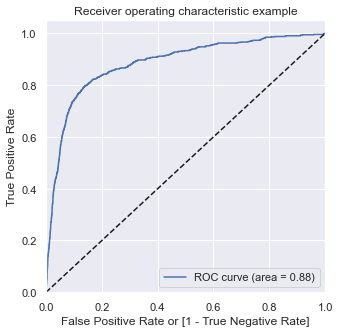

In [258]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob)

We have the Area Under the Curve as 0.88 which is a good model

### Model Performance - Logistic Regression with PCA

| Train/Test | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Train | 0.8348  | 0.8361 | 0.8334 | 
| Test  | 0.8386  | 0.8120 | 0.8411 |

- AUC score of train model is 0.90
- AUC score of test model is 0.88
> The AUC scores are good for both and test and so we have built a good model

The **sensitivity** score of Logistic Regression with PCA has a much better score compared to Logistic Regression without PCA

## Decision Tree classification with PCA

In [259]:
train_pca.shape

(38618, 45)

In [260]:
test_pca.shape

(9001, 45)

### Default Model

In [261]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [262]:
# Starting a default Decision Tree model with max depth of 3
dt = DecisionTreeClassifier(max_depth=3, random_state=100, class_weight='balanced')

In [263]:
dt.fit(train_pca, y_train_smote)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=100)

In [264]:
# Train and test predictions
y_train_pred = dt.predict(train_pca)
y_test_pred = dt.predict(test_pca)

Test evaluation

In [265]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification report
print(classification_report(y_test, y_test_pred))
# confusion matrix
print("*"*50)
print(confusion_matrix(y_test,y_test_pred))
print("*"*50)
# accuracy of the decision tree
print('Decision Tree - Test Accuracy :',accuracy_score(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82      8251
           1       0.19      0.73      0.30       750

    accuracy                           0.72      9001
   macro avg       0.58      0.73      0.56      9001
weighted avg       0.90      0.72      0.78      9001

**************************************************
[[5917 2334]
 [ 200  550]]
**************************************************
Decision Tree - Test Accuracy : 0.7184757249194534


### Tuning max_depth

In [266]:
from sklearn.model_selection import GridSearchCV

In [267]:
dt = DecisionTreeClassifier(random_state=100, class_weight='balanced')

params = {
            'max_depth' : [2,3,5,10,20,30,40,50]
        }

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params, 
                           cv=5, 
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(train_pca, y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [268]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'max_depth': 30}
0.8802890952412149
DecisionTreeClassifier(class_weight='balanced', max_depth=30, random_state=100)


'max_depth': 30 is the best parameter

### Tuning min_samples_leaf

In [269]:
dt = DecisionTreeClassifier(random_state=100, class_weight='balanced')

params = {
            'min_samples_leaf' : [5,10,20,50,100,150,200]
        }

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params, 
                           cv=5, 
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(train_pca, y_train_smote)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 10, 20, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [270]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'min_samples_leaf': 5}
0.8653218680767724
DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=100)


'min_samples_leaf': 5 is the best parameter

### Tuning min_samples_split

In [271]:
dt = DecisionTreeClassifier(random_state=100, class_weight='balanced')

params = {
            'min_samples_split' : [5,10,20,50,100,150,200]
        }

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params, 
                           cv=5, 
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(train_pca, y_train_smote)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 20, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [272]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'min_samples_split': 5}
0.8773630361414148
DecisionTreeClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=100)


'min_samples_split': 5 is the best parameter

### 1st run of hyperparameter tuning

In [273]:
dt = DecisionTreeClassifier(random_state=100, class_weight='balanced')

params = {
            'max_depth' : [26,28,30,32,34], # Values before and after 30
            'min_samples_leaf' : [1,3,5,7,9], # Values before and after 5
            'min_samples_split' : [1,3,5,7,9] # Values before and after 5
#             'criterion' : ['gini','entropy']
        }

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params, 
                           cv=5, 
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(train_pca, y_train_smote)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [26, 28, 30, 32, 34],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [1, 3, 5, 7, 9]},
             scoring='accuracy', verbose=1)

In [274]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'max_depth': 28, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.8799006384515426
DecisionTreeClassifier(class_weight='balanced', max_depth=28,
                       min_samples_split=3, random_state=100)


### Final tuned model

In [275]:
# Keeping min_samples_leaf=5
dt = DecisionTreeClassifier(max_depth=28, min_samples_leaf=1, min_samples_split=3, 
                            random_state=100, class_weight='balanced')

dt.fit(train_pca, y_train_smote)

DecisionTreeClassifier(class_weight='balanced', max_depth=28,
                       min_samples_split=3, random_state=100)

### Model evaluation on train

In [276]:
# Predicting on the Train set
y_train_pred = dt.predict(train_pca)
y_train_pred_proba = dt.predict_proba(train_pca)[:,1]

In [277]:
# Model evaluation metrics on train
print ("Accuracy :",metrics.roc_auc_score(y_train_smote, y_train_pred))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smote, y_train_pred))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smote, y_train_pred_proba))

Accuracy : 0.9914029727070279
Recall/Sensitivity : 0.9964265368481019
AUC Score (Train): 0.9981125636883058


### Model evaluation on test

In [278]:
# Predicting on the test set
y_test_pred = dt.predict(test_pca)
y_test_pred_proba = dt.predict_proba(test_pca)[:,1]

In [279]:
# Model evaluation metrics on train
print ("Accuracy :",metrics.roc_auc_score(y_test, y_test_pred))
print ("Recall/Sensitivity :",metrics.recall_score(y_test, y_test_pred))
print ("AUC Score (Test):",metrics.roc_auc_score(y_test, y_test_pred_proba))

Accuracy : 0.6841902799660647
Recall/Sensitivity : 0.508
AUC Score (Test): 0.6762950753444027


### Model Performance - Decision Tree with PCA

| Train/Test | Accuracy | Sensitivity | AUC |
| --- | --- | --- | --- |
| Train | 0.9914  | 0.9964 | 0.9981 | 
| Test  | 0.6841  | 0.5080 | 0.6762 |

- The model has very poor test Accuracy 68% and Sensitivity of 50.8%. This happens as Decision Tree is very prone to overfitting (sometimes even after pruning).
- To resolve the issue, we can go ahead and build a Random Forest model which reduces the overfitting problem in Decision Trees.

## Random Forest classification with PCA

### Default Model

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
# Starting default model with depth of 3 and n_estimators of 10
rf = RandomForestClassifier(random_state=100, max_depth=3, 
                            n_estimators=10, oob_score=True,
                            class_weight='balanced', n_jobs=-1)

In [282]:
rf.fit(train_pca, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=100)

In [283]:
rf.oob_score_

0.726319332953545

In [284]:
# Train and test predictions
y_train_pred = rf.predict(train_pca)
y_test_pred = rf.predict(test_pca)

Test evaluation

In [285]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification report
print(classification_report(y_test, y_test_pred))
# confusion matrix
print("*"*50)
print(confusion_matrix(y_test,y_test_pred))
print("*"*50)
# accuracy of the decision tree
print('Decision Tree - Test Accuracy :',accuracy_score(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      8251
           1       0.21      0.73      0.33       750

    accuracy                           0.75      9001
   macro avg       0.59      0.74      0.59      9001
weighted avg       0.90      0.75      0.80      9001

**************************************************
[[6213 2038]
 [ 205  545]]
**************************************************
Decision Tree - Test Accuracy : 0.7508054660593267


### Tuning n_estimators

In [286]:
classifier_rf = RandomForestClassifier(random_state=100, oob_score=True,
                            class_weight='balanced', n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'n_estimators': [10, 30, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, return_train_score=True,
                           scoring = "accuracy")

grid_search.fit(train_pca, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1, param_grid={'n_estimators': [10, 30, 50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [287]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'n_estimators': 200}
0.9550726330579
RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=100)


### Tuning max_depth

In [288]:
classifier_rf = RandomForestClassifier(random_state=100, oob_score=True,
                            class_weight='balanced', n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, return_train_score=True,
                           scoring = "accuracy")

grid_search.fit(train_pca, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 5, 10, 20]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [289]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'max_depth': 20}
0.9481845708538519
RandomForestClassifier(class_weight='balanced', max_depth=20, n_jobs=-1,
                       oob_score=True, random_state=100)


### Tuning min_samples_leaf

In [290]:
classifier_rf = RandomForestClassifier(random_state=100, oob_score=True,
                            class_weight='balanced', n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'min_samples_leaf': [50, 100, 150, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, return_train_score=True,
                           scoring = "accuracy")

grid_search.fit(train_pca, y_train_smote)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [50, 100, 150, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [291]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'min_samples_leaf': 50}
0.8687399453509878
RandomForestClassifier(class_weight='balanced', min_samples_leaf=50, n_jobs=-1,
                       oob_score=True, random_state=100)


### Tuning min_samples_split

In [292]:
classifier_rf = RandomForestClassifier(random_state=100, oob_score=True,
                            class_weight='balanced', n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'min_samples_split': [50, 100, 150, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, return_train_score=True,
                           scoring = "accuracy")

grid_search.fit(train_pca, y_train_smote)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_split': [50, 100, 150, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [293]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'min_samples_split': 50}
0.9107669245055512
RandomForestClassifier(class_weight='balanced', min_samples_split=50, n_jobs=-1,
                       oob_score=True, random_state=100)


### 1st run of hyperparameter tuning

In [294]:
classifier_rf = RandomForestClassifier(random_state=100, oob_score=True,
                            class_weight='balanced', n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'n_estimators': [200,300],
    'max_depth': [20,25],
    'min_samples_leaf': [50,100],
    'min_samples_split': [50,100]
}

# Instantiate the grid search model (using cv=3) as it takes more time
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, return_train_score=True,
                           scoring = "accuracy")

grid_search.fit(train_pca, y_train_smote)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [20, 25], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100],
                         'n_estimators': [200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [295]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'max_depth': 25, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}
0.8664611872344529
RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=100)


### Final tuned model

In [296]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=100)

rf.fit(train_pca, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=100)

### Model evaluation on train

In [297]:
# Predicting on the Train set
y_train_pred = rf.predict(train_pca)
y_train_pred_proba = rf.predict_proba(train_pca)[:,1]

In [298]:
# Model evaluation metrics on train
print ("Accuracy :",metrics.roc_auc_score(y_train_smote, y_train_pred))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smote, y_train_pred))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smote, y_train_pred_proba))

Accuracy : 0.8975089336578796
Recall/Sensitivity : 0.8940908384691076
AUC Score (Train): 0.9640963216356457


### Model evaluation on test

In [299]:
# Predicting on the test set
y_test_pred = rf.predict(test_pca)
y_test_pred_proba = rf.predict_proba(test_pca)[:,1]

In [300]:
# Model evaluation metrics on train
print ("Accuracy :",metrics.roc_auc_score(y_test, y_test_pred))
print ("Recall/Sensitivity :",metrics.recall_score(y_test, y_test_pred))
print ("AUC Score (Test):",metrics.roc_auc_score(y_test, y_test_pred_proba))

Accuracy : 0.8045522562921666
Recall/Sensitivity : 0.7213333333333334
AUC Score (Test): 0.8840413687229831


### Model Performance - Random Forest with PCA

| Train/Test | Accuracy | Sensitivity | AUC |
| --- | --- | --- | --- |
| Train | 0.8975  | 0.8940 | 0.9640 | 
| Test  | 0.8045  | 0.7213 | 0.8840 |

Random Forest classification model is performing much better than Decision Trees.
However, the sensitivity/recall score for Test is only 72% which is still less than 81.2% for Logistic Regression with PCA

# Conclusion

## Comparing performance of non-interpretable models

### 1. Model Performance - Logistic Regression with PCA

| Train/Test | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Train | 0.8348  | 0.8361 | 0.8334 | 
| Test  | 0.8386  | 0.8120 | 0.8411 |

- AUC score of train model is 0.90
- AUC score of test model is 0.88

### 2. Model Performance - Decision Tree with PCA

| Train/Test | Accuracy | Sensitivity | AUC |
| --- | --- | --- | --- |
| Train | 0.9914  | 0.9964 | 0.9981 | 
| Test  | 0.6841  | 0.5080 | 0.6762 |

- The model has very poor test Accuracy 68% and Sensitivity of 50.8%. This happens as Decision Tree is very prone to overfitting (sometimes even after pruning).
- To resolve the issue, we can go ahead and build a Random Forest model which reduces the overfitting problem in Decision Trees.

### 3. Model Performance - Random Forest with PCA

| Train/Test | Accuracy | Sensitivity | AUC |
| --- | --- | --- | --- |
| Train | 0.8975  | 0.8940 | 0.9640 | 
| Test  | 0.8045  | 0.7213 | 0.8840 |

Random Forest classification model is performing much better than Decision Trees.
However, the sensitivity/recall score for Test is only 72% which is still less than 81.2% for Logistic Regression with PCA

**Observations**
- Looking at all three models above, we can clearly see that **Logistic Regression with PCA** is the clear choice of the ***best model*** among them to predict Customers who will churn.
- This is because it has the highest Sensitivity score of 81.2% with test data.
- We are using **Sensitivity as the evaluation metric** as it measures the proportion of actual positives that were correctly identified (i.e., Basically % of churn we correctly identify out of the actual churn)

## Model Performance - Logistic Regression without PCA (Interpretable model)

| Train/Test | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Train | 0.8022  | 0.8056 | 0.7988 | 
| Test  | 0.7988  | 0.7813 | 0.8003 |

- AUC score of train model is 0.87
- AUC score of test model is 0.86

## Important indicators of customer churn (identified by Logistic Regression model without PCA)

| Important Features | Column Information |
| --- | --- |
| arpu_7    |             Average revenue per use for month 7  |
| std_og_mou_7    |       STD outgoing calls minutes of usage for month 7  |
| loc_ic_mou_7     |      Local incoming calls minutes of usage for month 7  |
| std_ic_mou_8   |        STD incoming calls minutes of usage for month 8 |
| spl_ic_mou_8    |       Special incoming calls minutes of usage for month 8  |
| isd_ic_mou_8   |        ISD incoming calls minutes of usage for month 8  |
| total_rech_num_8    |   Total number of recharges done for month 8  |
| last_day_rch_amt_8  |   Total amount recharged on the last date of month 8  |
| max_rech_data_8    |    Maximum data recharge for month 8  |
| vol_2g_mb_8    |        Mobile internet usage volume (in MB) for 2G in month 8  |
| sep_vbc_3g      |       Volume based cost for september (month 8)  |

## Recommendations to manage Customer churn

For this telecom company, it's more important to identify churners than non-churners. This is because to reduce churn, customer retention is the most important criterion than anything else. <br>
So, we will have to choose **Sensitivity/Recall** as our evaluation metric as it measures the proportion of actual positives that were correctly identified. <br>
The important predictor attributes of churn are listed above. <br>

***Recommendations:***
1. The number of recharges, amount of recharge and the last day of recharge are important indicators of customer usage. If any of them decrease, it could be a sign that the customer is trying to wait the remaining period of validity and then try to switch providers. Recharge packs with discount can be offered during this period to retain customer.
2. Internet usage is also an important variable as it indicates if the customer is actively using the mobile for operations such as social networking, mobile banking, bill payments etc., and any reduction/non-usage indicates higher possibility of churn. Data Packs can be offered as a bundle/reduced prices/free for a month to attract customer to be in the network. 
3. Incoming and Outgoing calls in the last good month 7 and action phase month 8 also need to be taken into consideration
4. STD, ISD & Special incoming calls for month 8 need to monitored for usage consistently and see if we are able to identify any drop in the usage pattern
5. Depending on the volume based cost for 8th month, we can observe if the customer is making a commitment to stay further on the network through month 9
6. Average revenue per user should also be monitored for reduction in consumption which would indicate potential customer churn